# Global Power Plant Database

### Problem Statement:
> #### Description

>>The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:


- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

- Prediction :  
    
    Make two prediction : 1) Primary Fuel    2) capacity_mw 

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
df.head() #Checking Top 5 record 

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail() #checking button 5 record

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample() #Checking random sample record

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
45,IND,India,BALCO TPP,IND0000025,600.0,NaN,NaN,Coal,Oil,NaN,...,2019.0,NaN,NaN,1437.9547,2800.0,2120.68,2553.0,NaN,Central Electricity Authority,NaN


### Exploratory Data Analysis (EDA)

In [13]:
df.columns #Checking all column names 

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.shape

(907, 27)

From above code we can see that their is 27 columns and 907 rows

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [16]:
df.dtypes #Checking data type for all column

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [43]:
df.info() #Data info in detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Checking Null values

In [17]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

From above code we can see there are multiple null values are present in dataset as mentioned below :

- `latitude`-46
- `longitude`-46
- `other_fuel1`-709
- `other_fuel2`-906
- `other_fuel3`-907
- `commissioning_year`-380
- `owner`-565
- `geolocation_source`-19
- `wepp_id`-907
- `year_of_capacity_data`-388
- `generation_gwh_2013`-907
- `generation_gwh_2014`-509
- `generation_gwh_2015`-485
- `generation_gwh_2016`-473
- `generation_gwh_2017`-467
- `generation_gwh_2018`-459
- `generation_gwh_2019`-907
- `generation_data_source`-458
- `estimated_generation_gwh`-907

We need to handle Null values 

### Null value using Heat map

<AxesSubplot:>

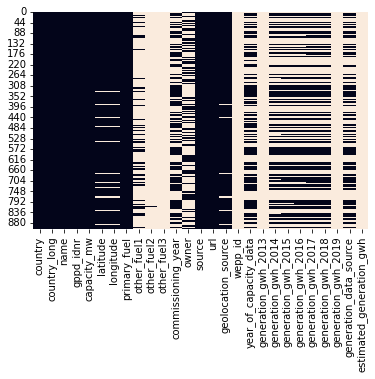

In [24]:
sns.heatmap(df.isnull(),cbar=False)

From heatmap ploting we can see Null values present in 19 columns

In [25]:
df['primary_fuel'].isnull().sum()

0

### Checking blank value in both Target column

In [29]:
df[df['primary_fuel']==''].index

Int64Index([], dtype='int64')

__from above code we can see that there is no blank values in primary_fuel__

In [27]:
df[df['capacity_mw']==''].index

Int64Index([], dtype='int64')

**from above code we can see that there is no blank values in primary_fuel**

##### Checking unique value in Target Variable

In [32]:
df['primary_fuel'].unique() #Checking unique values

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [35]:
df['primary_fuel'].nunique() #Checking count for unique value

8

In [31]:
df['capacity_mw'].unique()#Checking unique values

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [36]:
df['capacity_mw'].nunique() #Checking count for unique value

361

___Values in the targer variable___

In [37]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [38]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

### Data Cleaning and preprocessing

As we already seen that there is null values present in Dataset to we need to handle Null values

**Handling Null values**

In [47]:
#replacing null values in latitude column with mean
df['latitude'].fillna(df['latitude'].mean(),inplace=True)

In [48]:
#replacing null values in longitude column with mean
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

In [50]:
#checking values of column 'other_fuel1'
df["other_fuel1"].unique() 

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [52]:
#checking repeated values in "other_fuel1" column through mode
print( df["other_fuel1"].mode())

0    Oil
dtype: object


In [53]:
#Droping column 'other_fuel1' as it have only one type of value that is 'Oil' and thus it have no relation with our Target column
df=df.drop(columns="other_fuel1", axis=1)

In [54]:
#Droping "other_fuel2 " column from dataset because most of the values (906) are missing and we can not take mean, mode etc of it as our total data is 907. So, we will drop this column.
df=df.drop(columns="other_fuel2", axis=1)

In [55]:
#Droping "other_fuel3" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="other_fuel3", axis=1)

In [56]:
#checking all values of column 'commissioning_year'
df["commissioning_year"].unique() 

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [58]:
#replacing Null Values of "commissioning_year" column  by mean value
df["commissioning_year"].fillna(df["commissioning_year"].mean(), inplace=True)

In [59]:
#checking all values of column 'owner'
df["owner"].unique() 

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [61]:
#checking repeated values in "owner" column through mode
print(df["owner"].mode())

0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
dtype: object


In [62]:
#Droping "owner" column from dataset because this column's data have no relation with our Target Column. 
df=df.drop(columns="owner", axis=1)

In [63]:
#checking all values of column 'geolocation_source'
df["geolocation_source"].unique() 

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [64]:
#checking repeated values in "geolocation_source" column through mode
print(df["geolocation_source"].mode())

0    WRI
dtype: object


In [65]:
#Replacing Null Values of "geolocation_source" column in dataset by mode value
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0], inplace=True)

In [66]:
#Droping "wepp_id" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="wepp_id", axis=1)

In [67]:
#Filling Null Values of "year_of_capacity_data" column in dataset by mean value
df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mean(), inplace=True)

In [68]:
#Droping "generation_gwh_2013" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="generation_gwh_2013", axis=1)

In [69]:
#Replacing Null Values of "generation_gwh_2014" column in dataset by mode value
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(), inplace=True)

In [70]:
#Replacing Null Values of "generation_gwh_2015" column in dataset by mode value
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(), inplace=True)

In [71]:
#Replacing Null Values of "generation_gwh_2016" column in dataset by mode value
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(), inplace=True)

In [72]:
#Replacing Null Values of "generation_gwh_2017" column in dataset by mode value
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(), inplace=True)

In [73]:
#Replacing Null Values of "generation_gwh_2018" column in dataset by mode value
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean(), inplace=True)

In [74]:
#Droping "generation_gwh_2019" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="generation_gwh_2019", axis=1)

In [75]:
#checking all values of column 'generation_data_source'
df["generation_data_source"].unique() 

array([nan, 'Central Electricity Authority'], dtype=object)

Here we can see only 2 values are in this column (nan, 'Central Electricity Authority'), So we will drop this column as it contains null value most.

In [76]:
#Droping "generation_data_source" column from dataset.
df=df.drop(columns="generation_data_source", axis=1)

In [77]:
#Droping "estimated_generation_gwh" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="estimated_generation_gwh", axis=1)

##### As per above codes now we had removed all null values from dataset

# Checking Null value again

In [79]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

From above code we can see that there is no null values in dataset

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,1997.091082,13.016360,1927.0000,1997.091082,1997.091082,2003.000000,2018.000
year_of_capacity_data,907.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0000,896.500214,2467.936859,2467.936859,30015.000
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0000,882.594850,2547.759305,2547.759305,35116.000
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0000,824.842340,2600.804099,2600.804099,35136.000


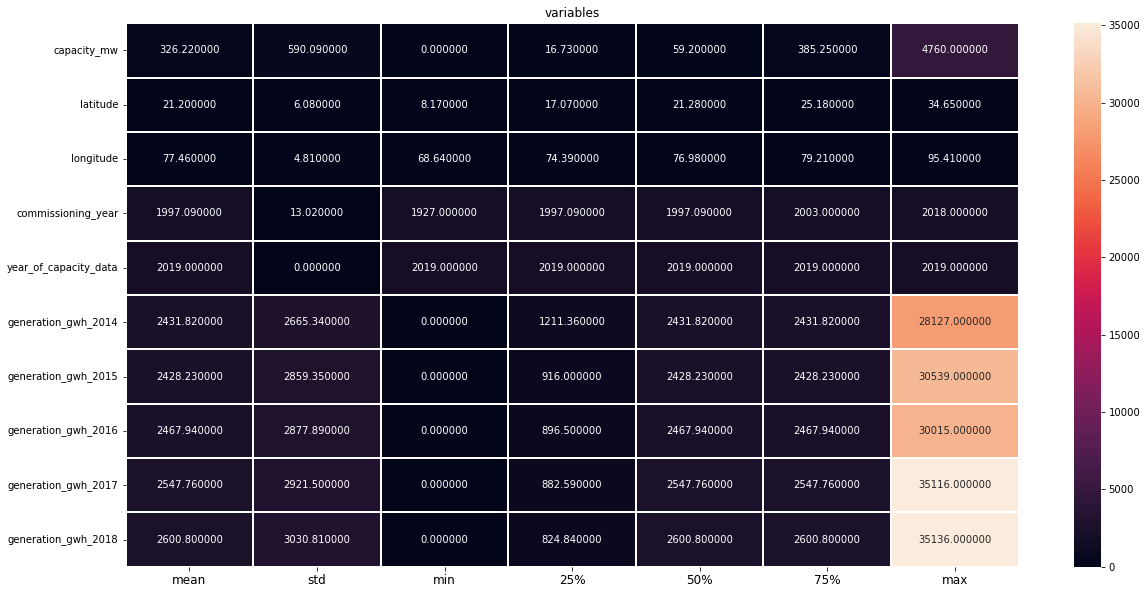

In [84]:
#Checking Description through heatmap also.
plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

#### Outcome of Describe of Datasets:
- Value of Std is higher than mean which shows skewness is present in most columns.
- We can see difference between 25% and 50% in columns ('generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018') are more compare to it's 50% and 75% (difference is 0), which shows outliers are present.
- difference between 25% and 50% in columns 'commissioning_year'is 0 and it's 50% and 75% (high difference), which shows outliers are present in it.
- Also in column "capacity_mw" difference is high between 50% and 75% compare to difference between 25% and 50%, which shows outliers are present in it.
- year_of_capacity_data have only one type of data, which means it have no relation with our target column, so we will drop this column also.


In [85]:
df["year_of_capacity_data"].unique

<bound method Series.unique of 0      2019.0
1      2019.0
2      2019.0
3      2019.0
4      2019.0
        ...  
902    2019.0
903    2019.0
904    2019.0
905    2019.0
906    2019.0
Name: year_of_capacity_data, Length: 907, dtype: float64>

In [86]:
#Droping column 'year_of_capacity_data' as it have only one type of value that is '2019' and thus it have no relation with our Target column
df=df.drop(columns="year_of_capacity_data", axis=1)

In [87]:
# checking total Columns after droping column "year_of_capacity_data"
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [88]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [89]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
df=df.drop(columns="gppd_idnr", axis=1)

In [90]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [91]:
#Droping column 'country' as it have only one type of value that is 'IND' and thus it have no relation with our Target column
df=df.drop(columns="country", axis=1)

In [92]:
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [93]:
#Droping column 'country_long' as it have only one type of value that is 'India' and thus it have no relation with our Target column
df=df.drop(columns="country_long", axis=1)

In [94]:
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [95]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
df=df.drop(columns="name", axis=1)

In [96]:
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [97]:
#Droping column 'source' as it have no relation with our Target column
df=df.drop(columns="source", axis=1)

In [98]:
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [99]:
#Droping column 'url' as it have no relation with our Target column
df=df.drop(columns="url", axis=1)

In [100]:
df["geolocation_source"].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [102]:
df.shape

(907, 11)

In [101]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [103]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,1997.091082,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,1997.091082,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


### Data Visualization
> ### Using Countplot for categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


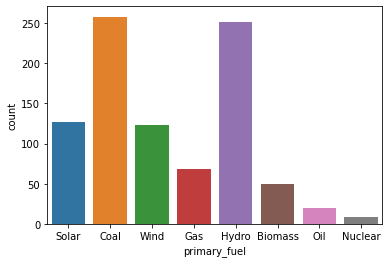

In [105]:
#Count Plot for "primary_fuel" column
print(df["primary_fuel"].value_counts())

sns.countplot("primary_fuel",data=df)
plt.show()

As per above plotting we can see that
- Coal is most used primary fuel
- Nuclear is least used primary fuel

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


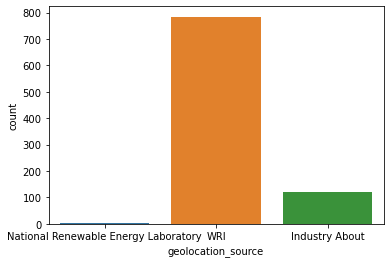

In [107]:
#Count Plot for "geolocation_source" column
print(df["geolocation_source"].value_counts())

sns.countplot("geolocation_source",data=df)
plt.show()

'WRI' is used more as a geolocation source than 'Industry About' and than 'National Renewable Energy Laboratory

### Histplot

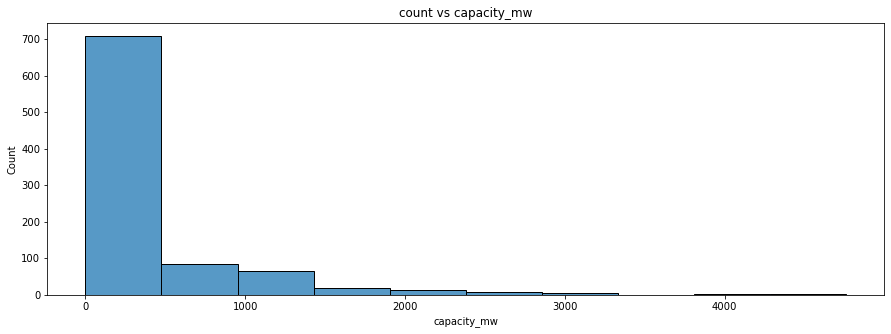

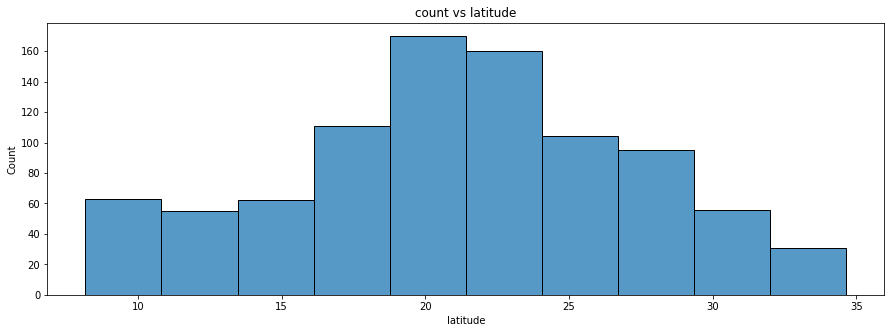

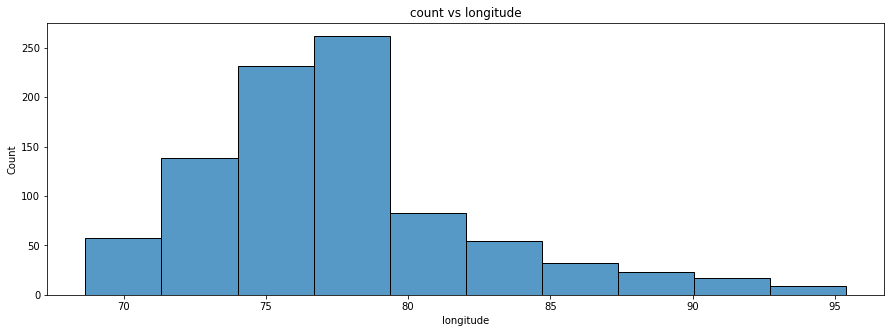

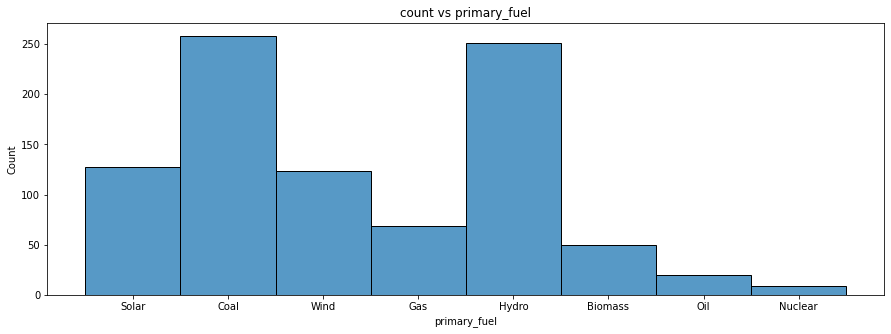

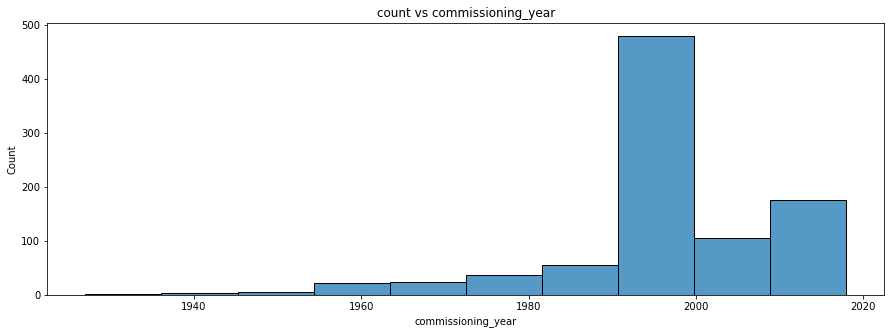

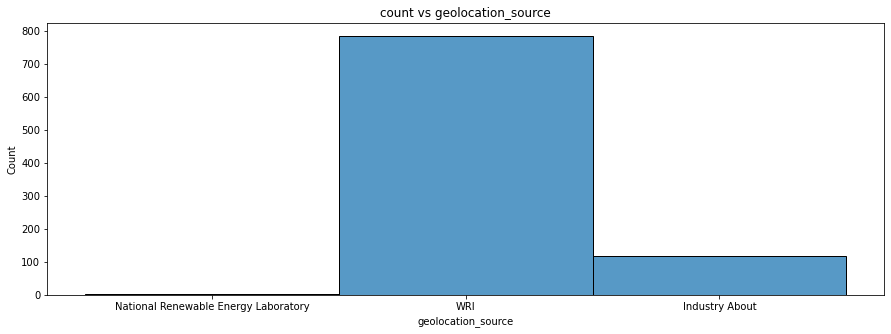

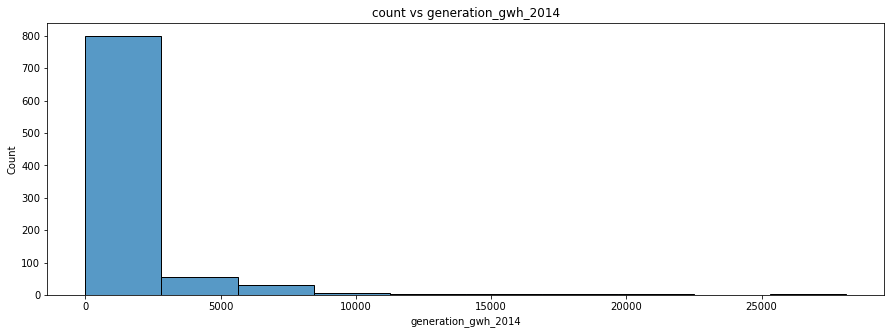

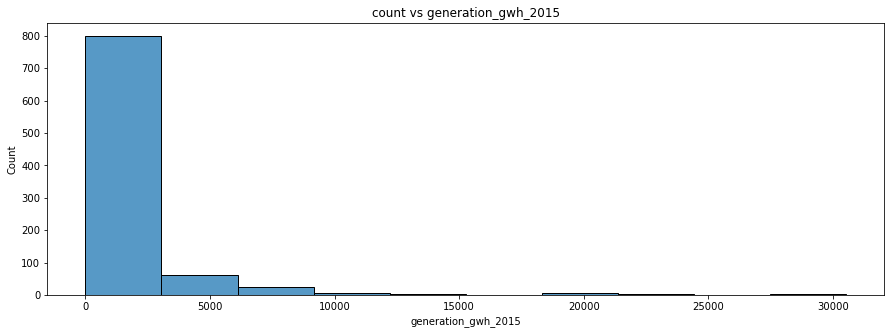

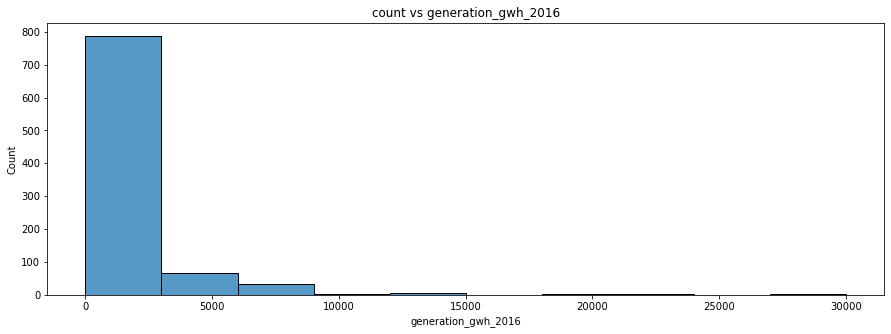

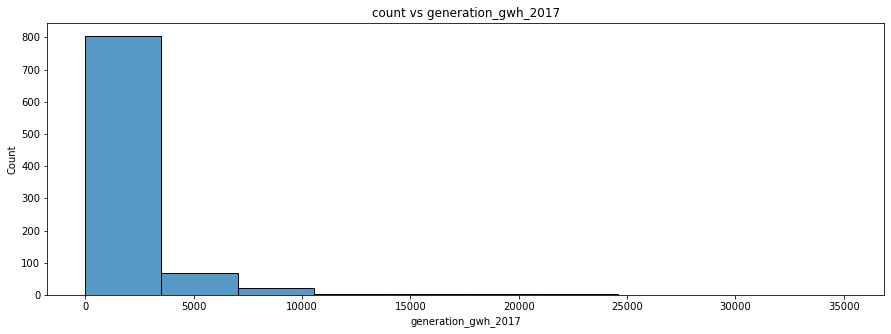

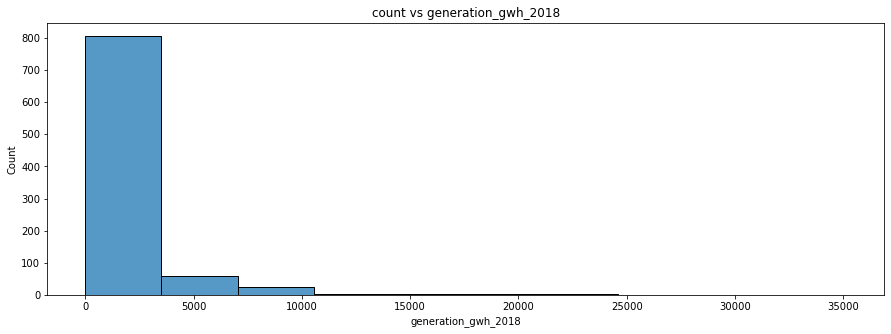

In [123]:
#HistPlot for columns vs count
for i in df.columns:
    plt.figure(figsize=(15,5))
    plt.title('count vs '+ i )
    sns.histplot(x=i,data=df,bins=10)
    plt.show()


<u>**From above plotting we can observation as mentioned below**</u>

- capacity_mw between `0 to 500` is highest.
- Latitude in between `19-21` is highest
- longitude between `76 to 79` is highest
- commissioning_year `1997` is highest.
- generation_gwh_2014 between `0 to 2500` is highest.
- generation_gwh_2015 between `0 to 2500` is highest.
- generation_gwh_2016 between `0 to 2500` is highest.
- generation_gwh_2017 between `0 to 2700` is highest.
- generation_gwh_2018 between `0 to 2700` is highest.

### Bivariate Analysis

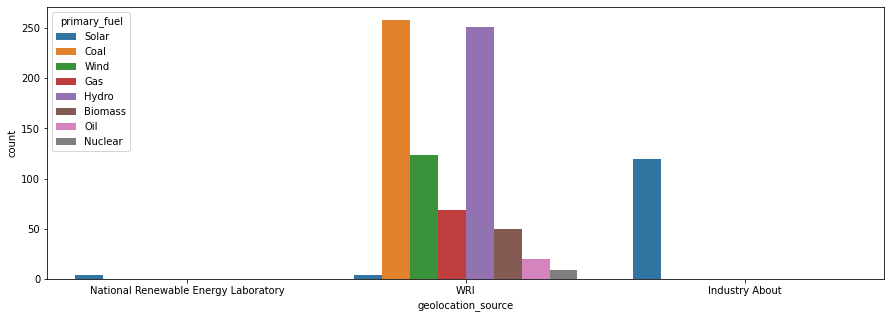

In [126]:
#Count Plot for comparision between "geolocation_source" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.countplot("geolocation_source",data=df, hue='primary_fuel')
plt.show()

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

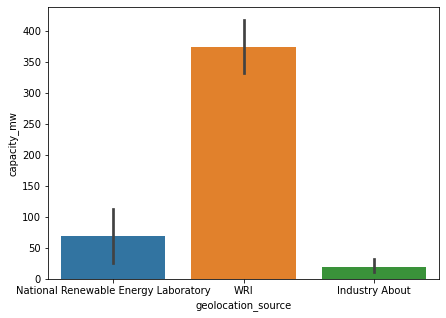

In [130]:
#Count Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source", y='capacity_mw',data=df)
plt.show()

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

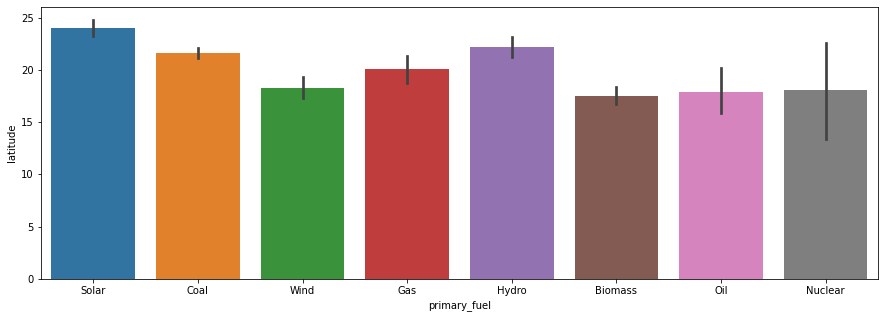

In [134]:
#hist Plot for comparision between "latitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="latitude",data=df,x='primary_fuel')
plt.show()

We can see Solar is used most.

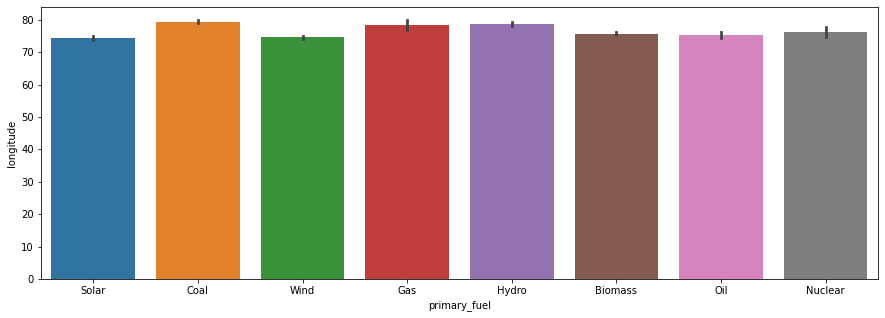

In [135]:
#hist Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=df,x='primary_fuel')
plt.show()

We can see Coal is used most.

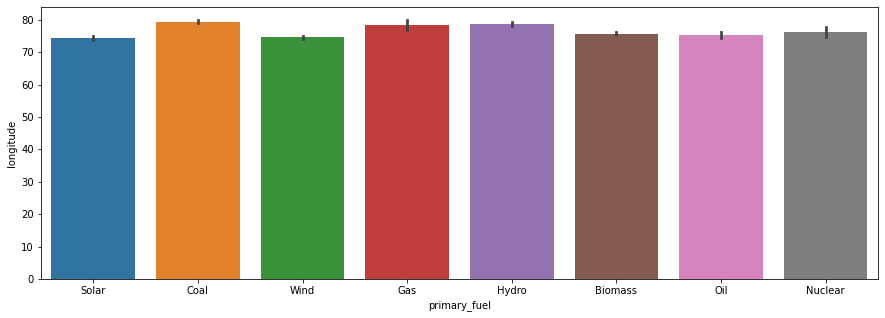

In [136]:
#Bar Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=df,x='primary_fuel')
plt.show()

We can see Coal is used most.

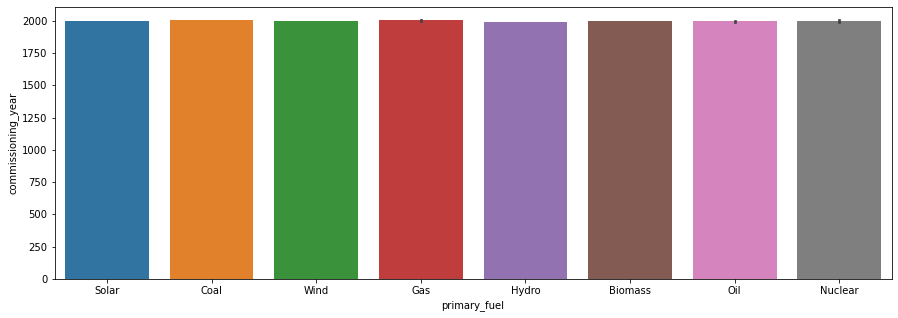

In [137]:
#Bar Plot for comparision between "commissioning_year" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="commissioning_year",data=df,x='primary_fuel')
plt.show()

All primary_fuel used equally.

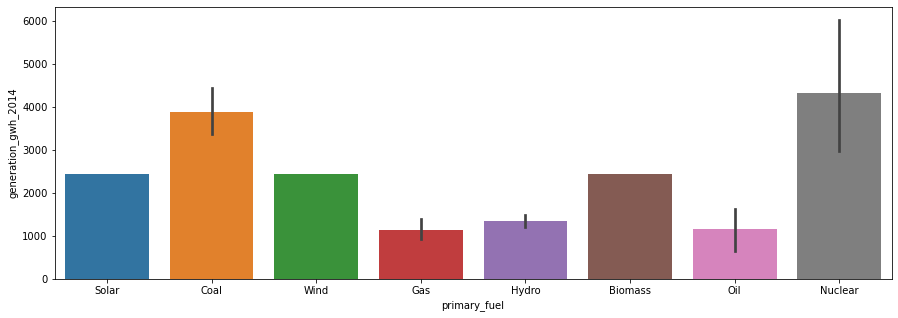

In [138]:
#Bar Plot for comparision between "generation_gwh_2014" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2014",data=df,x='primary_fuel')
plt.show()

We can see Nuclear is used most.

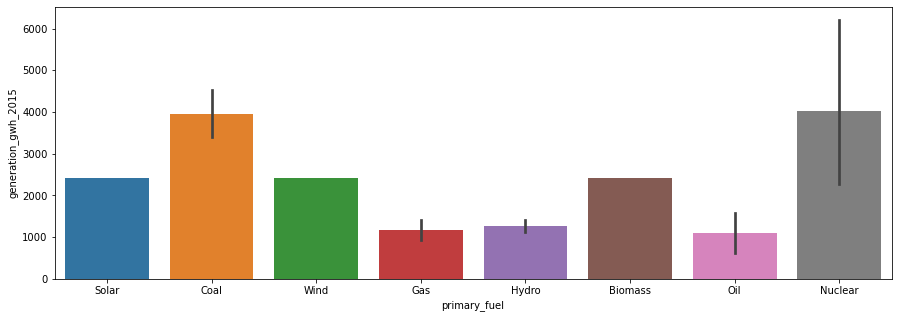

In [139]:
#Bar Plot for comparision between "generation_gwh_2015" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2015",data=df,x='primary_fuel')
plt.show()

We can see Nuclear is used most.

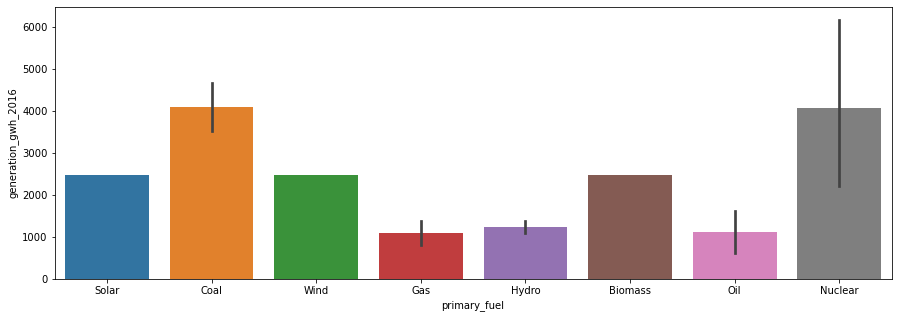

In [140]:
#Bar Plot for comparision between "generation_gwh_2016" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2016",data=df,x='primary_fuel')
plt.show()

We can see Nuclear is used most.

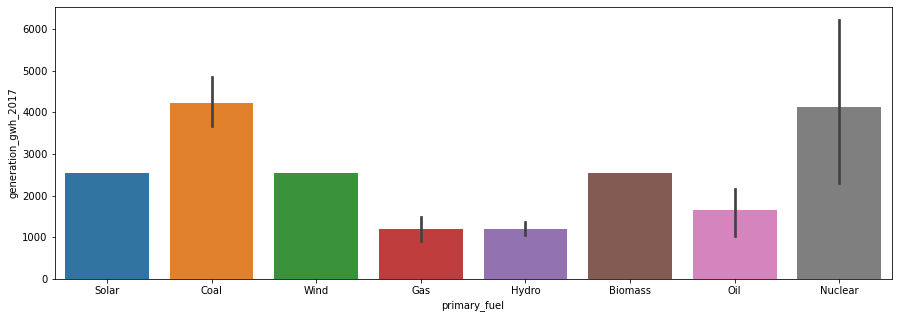

In [141]:
#Bar Plot for comparision between "generation_gwh_2017" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2017",data=df,x='primary_fuel')
plt.show()

We can see Coal is used most.

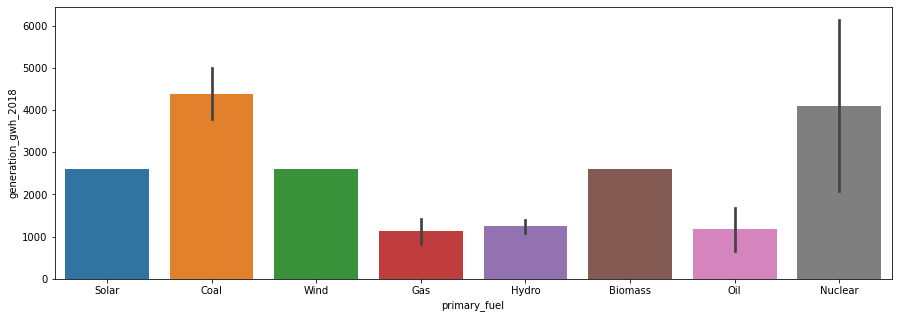

In [142]:
#Bar Plot for comparision between "generation_gwh_2018" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2018",data=df,x='primary_fuel')
plt.show()

We can see Coal is used most.

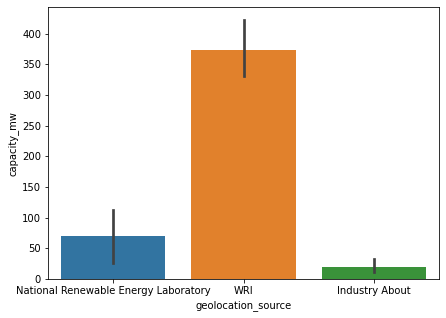

In [143]:
#Bar Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=df, y='capacity_mw')
plt.show()

We can see WRI is used most.

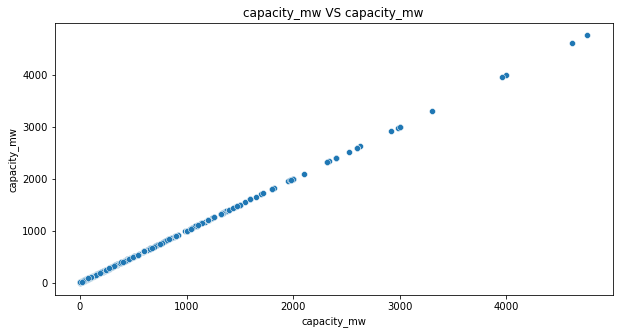

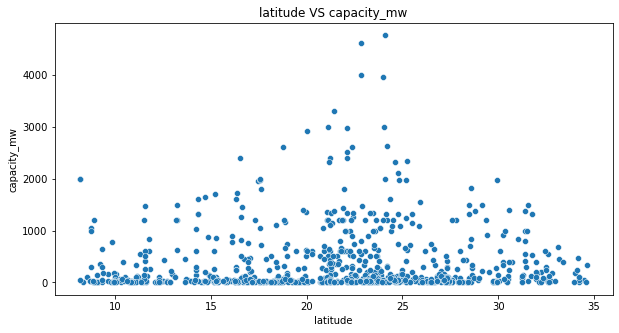

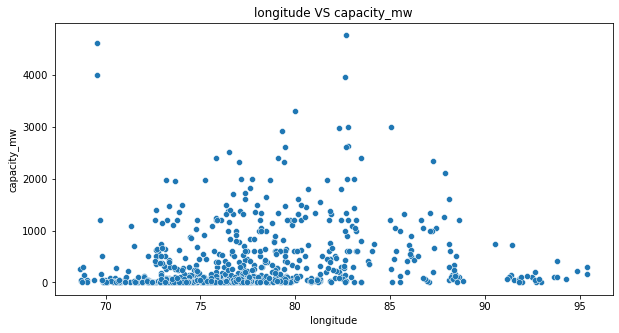

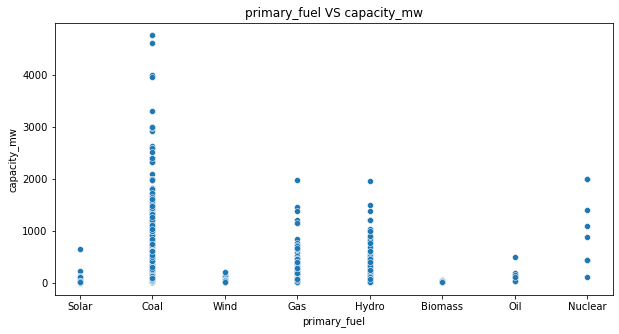

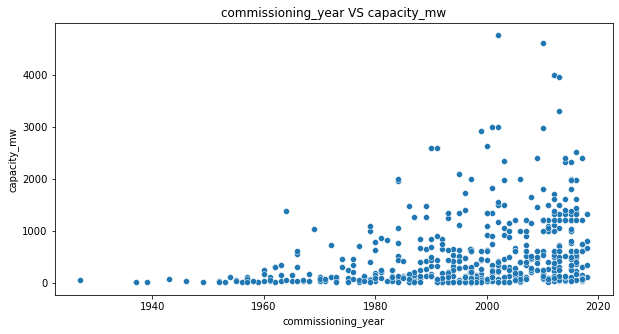

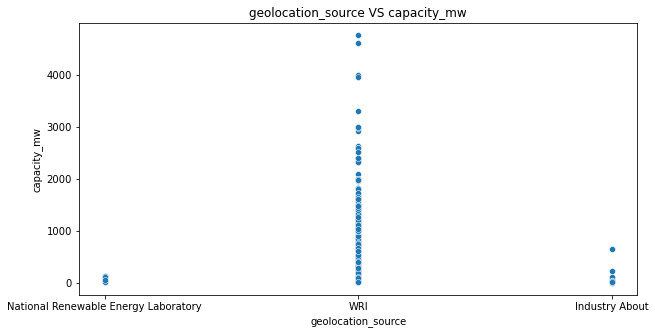

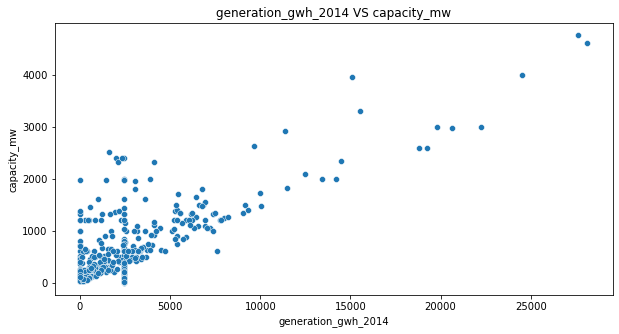

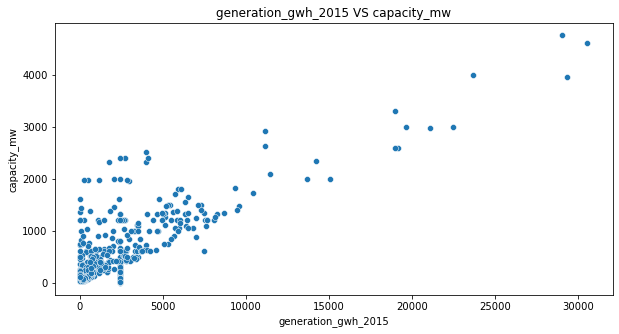

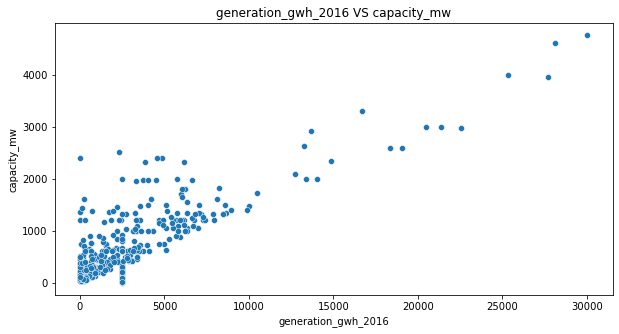

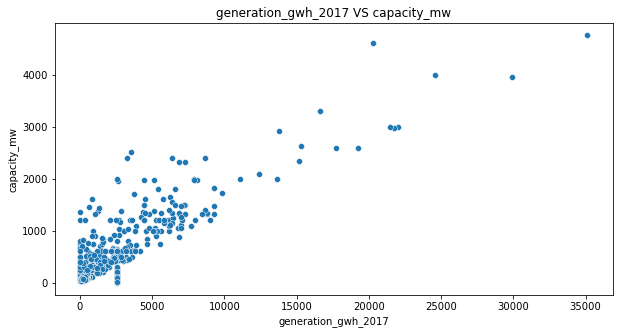

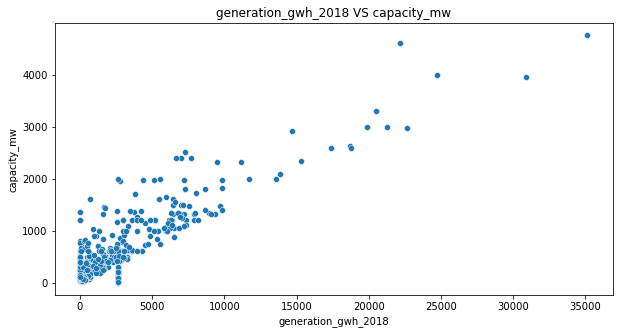

In [145]:
#scatterplot for comparision between column and "capacity_mw" column
for sca in df.columns:
    plt.figure(figsize=(10,5))
    plt.title(sca + ' VS capacity_mw')
    sns.scatterplot(x=sca,y='capacity_mw',data=df)
    plt.show()

**<u>From above scatter plotting we can see below observation</u>**

- there is correlation between "latitude" column and "capacity_mw" column.
- there is correlation between "longitude" column and "capacity_mw" column.
- High Positive correlation between "generation_gwh_2014" column and "capacity_mw" column.
- High Positive correlation between "generation_gwh_2015" column and "capacity_mw" column.
- High Positive correlation between "generation_gwh_2016" column and "capacity_mw" column.
- High Positive correlation between "generation_gwh_2017" column and "capacity_mw" column.
- High Positive correlation between "generation_gwh_2018" column and "capacity_mw" column.

### Multivariate Analysis
> ### Using barplot

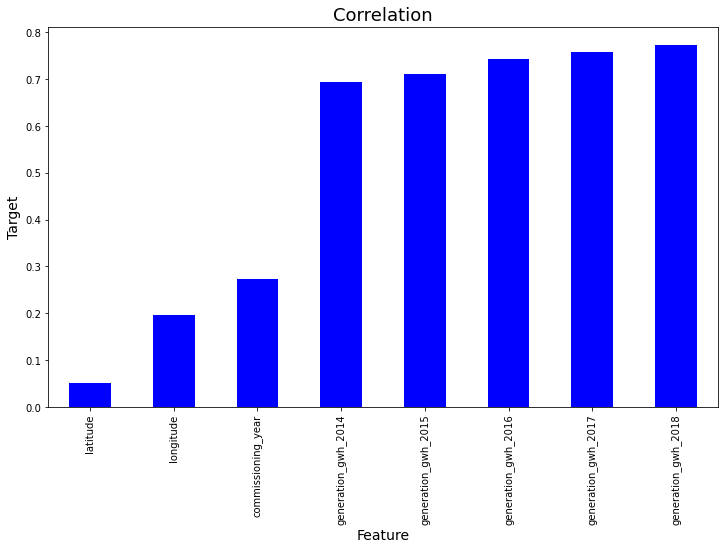

In [146]:
plt.figure(figsize=(12,7))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

We can see All Columns are positively correlated with target column "capacity_mw"

## Correlation

In [147]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


In [148]:
df.corr()["capacity_mw"].sort_values()

latitude               0.050984
longitude              0.195882
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

### Observation: 
- We can observe least correlation is with column "latitude" and strong correlation is with column "generation_gwh_2018". 
- All columns are positively correlated with target column "capacity_mw".

### checking correlation with heatmap

<AxesSubplot:>

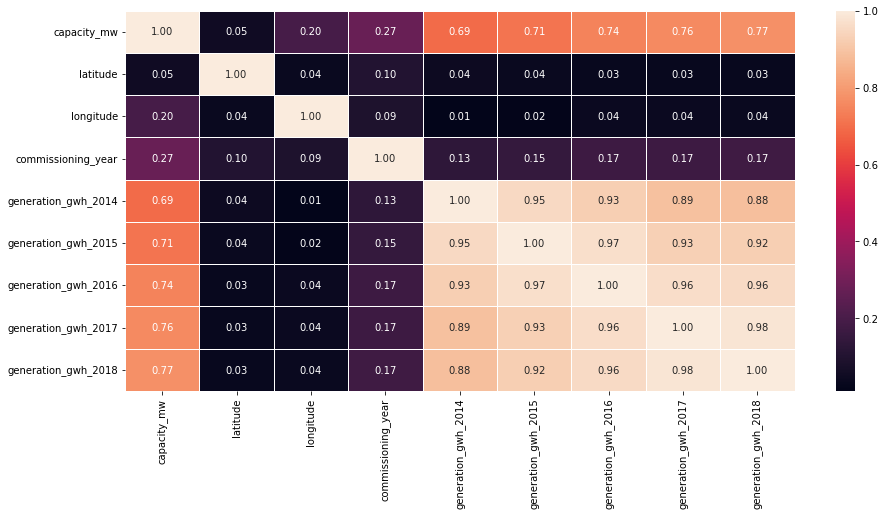

In [149]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation with Target Column "capacity_mw" : 

- 'latitude' has 5 percent correlation with the target column which can be considered as weak correlation and positively correlated.
- 'longitude' has 20 percent correlation with the target column which can be considered as good correlation and positively correlated.
- 'commissioning_year' has 27 percent correlation with the target column which can be considered as good correlation and positively correlated.
- 'generation_gwh_2014' has 69 percent correlation with the target column which can be considered as good correlation and positively correlated.
- 'generation_gwh_2015' has 71 percent correlation with the target column which can be considered as good correlation and positively correlated.
- 'generation_gwh_2016' has 74 percent correlation with the target column which can be considered as good correlation and positively correlated.
- 'generation_gwh_2017' has 76 percent correlation with the target column which can be considered as good correlation and positively correlated.
- 'generation_gwh_2018' has 77 percent correlation with the target column which can be considered as strong correlation and positively correlated.


- Min Correlation: latitude

- Max Correlation: generation_gwh_2018

## Label Encoding

In [152]:
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [153]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [154]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

### Checking both target column unique value after transformation

In [155]:
df["primary_fuel"].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [156]:
df["capacity_mw"].nunique()

361

#### Checking dataset after transformation

In [157]:
df.head(10)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,1,2005.000000,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,3,1970.000000,2,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,3,2010.000000,2,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.0,16.3300,75.8863,3,2004.000000,2,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.0,23.1642,81.6373,1,2008.000000,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


In [158]:
df.shape

(907, 11)

In [161]:
df.corr()['primary_fuel'].sort_values()


geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

##### Observation:
    - All columns are negatively correlated with Target Column "primary_fuel"
    - We can observe least correlation is with column "geolocation_source" and strong correlation is with column "latitude". 


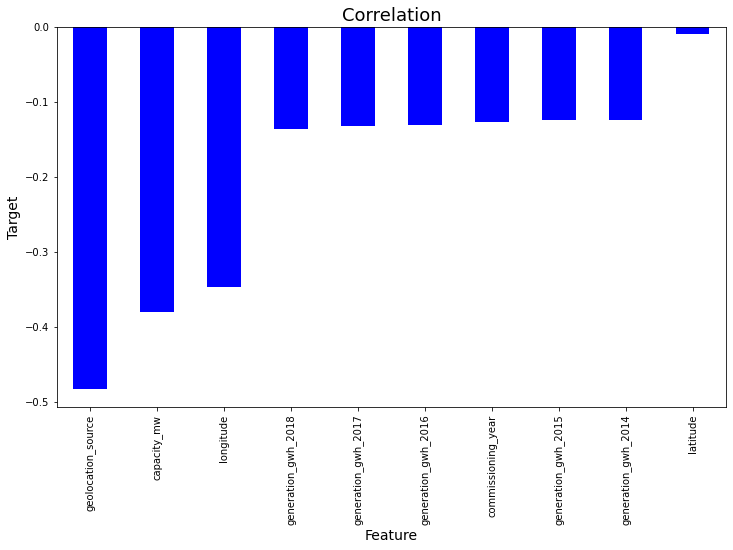

In [162]:
plt.figure(figsize=(12,7))
df.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- All columns are negatively correlated with Target Column "primary_fuel"

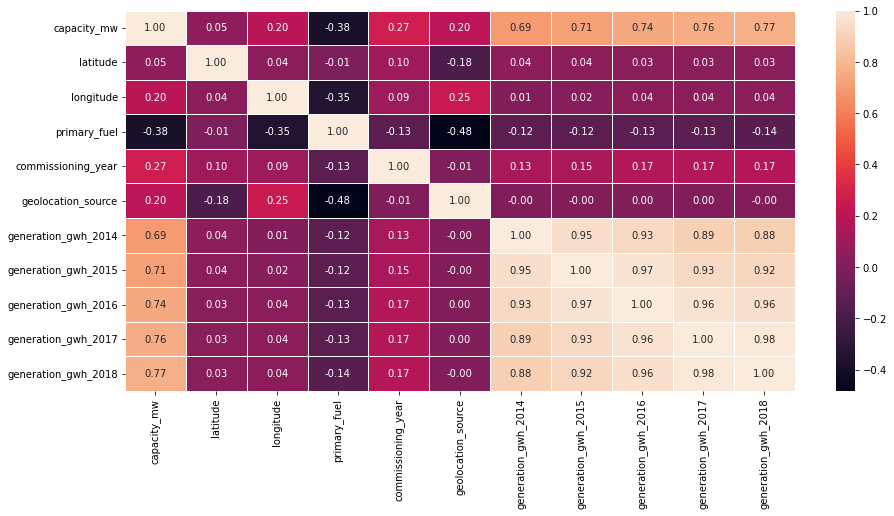

In [164]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')
plt.show()

### Outcome of Correlation with Target Column "primary_fuel" :

- 'capacity_mw' has -38 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'latitude' has -1 percent correlation with the target column which can be considered as strong correlation and negatively correlated.
- 'longitude' has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'commissioning_year' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'geolocation_source' has -48 percent correlation with the target column which can be considered as weak correlation and negatively correlated.
- 'generation_gwh_2014' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'generation_gwh_2015' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'generation_gwh_2016' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'generation_gwh_2017' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
- 'generation_gwh_2018' has -14 percent correlation with the target column which can be considered as good correlation and negatively correlated.


- Min Correlation: geolocation_source

- Max Correlation: latitude

### Checking Outliers

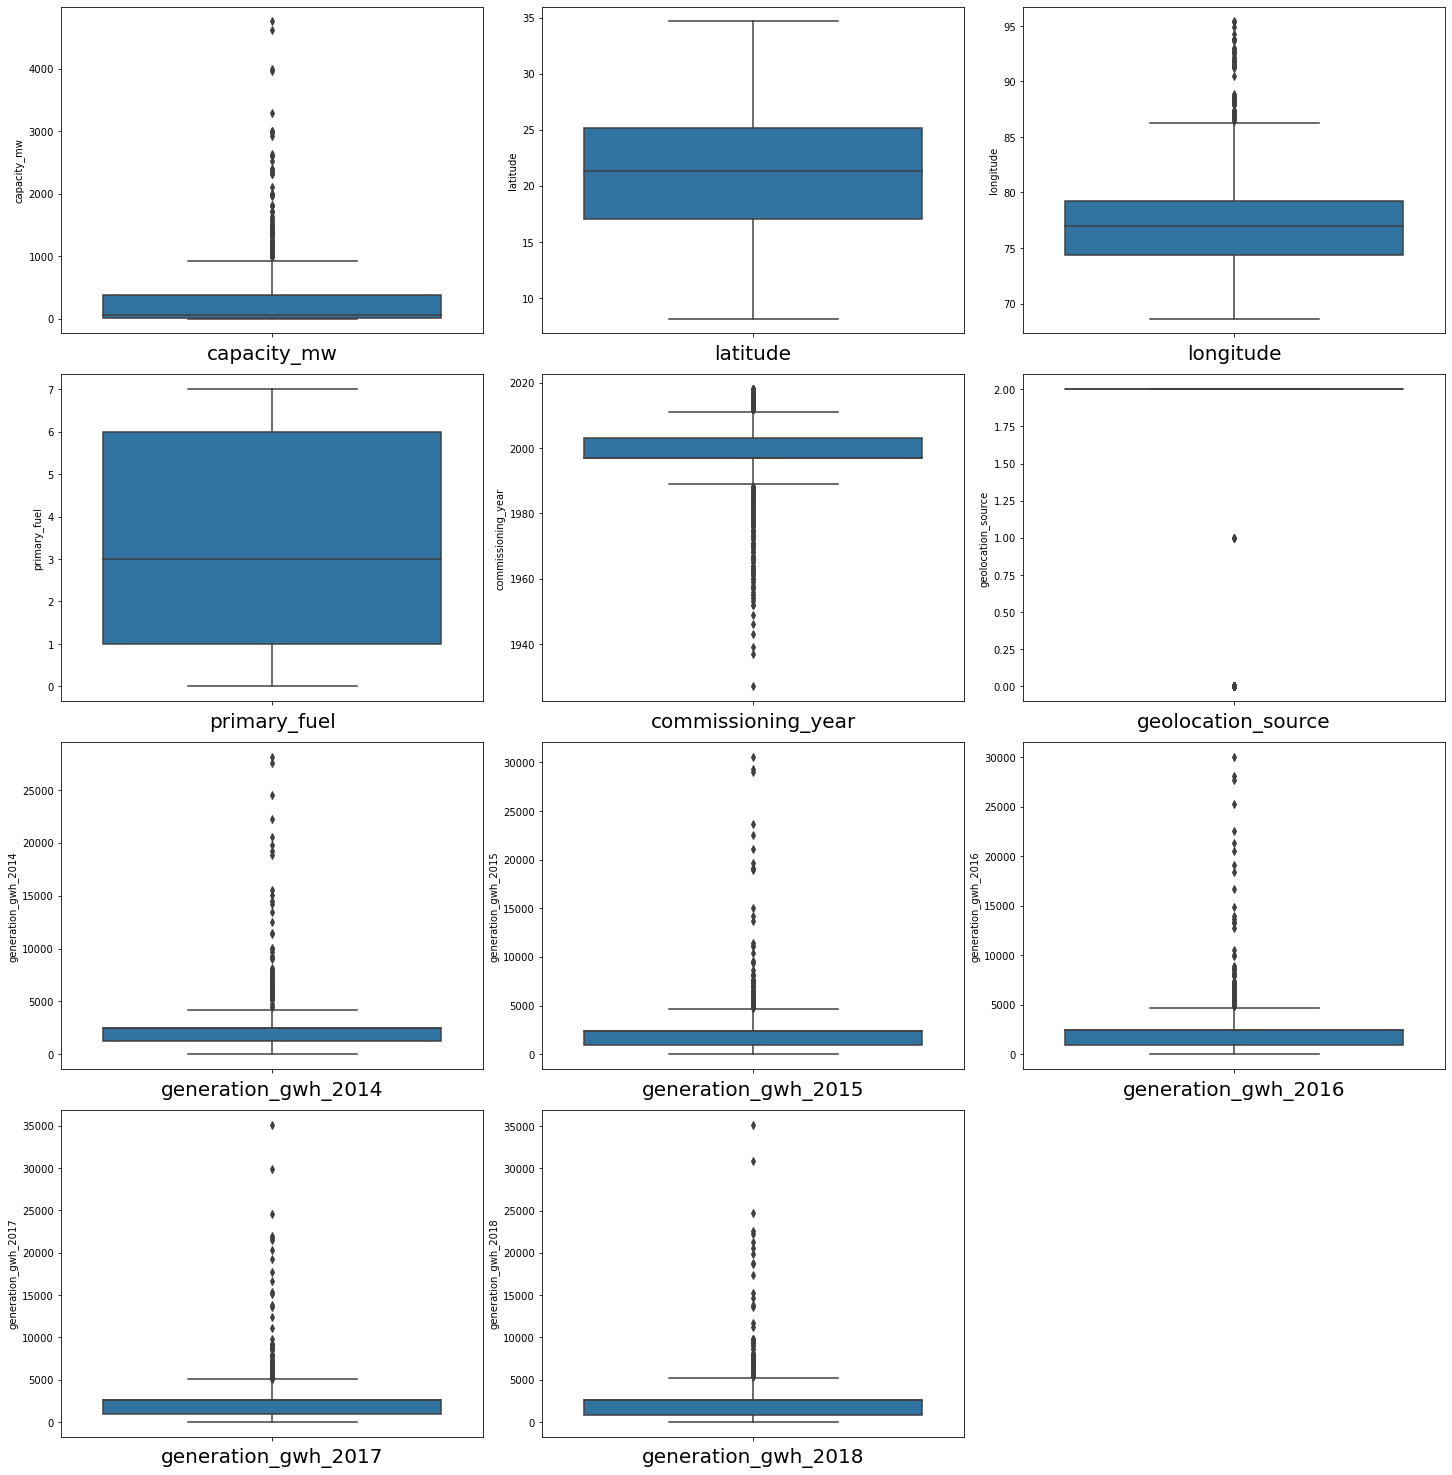

In [170]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
#features = df.drop("primary_fuel", axis=1)
for column in df.columns: #column in features:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column, data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

### Observation:
    
- Outliers are present in columns: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'.
- Outliers are not present in columns: 'latitude' and 'primary_fuel'
- But we will not remove Outliers from 'geolocation_source'  column as it is categorical column.
- Here we have to check two predictions : 'primary_fuel' and 'capacity_mw'. So we will remove outliers from 'capacity_mw' column when 'primary_fuel' is Target column and we will not remove outliers from it when 'capacity_mw' is Target column.

### Removing Outliers
> ##### Using Zscore method for Target Column "primary_fuel"

In [171]:
#  Outliers will be removed only from Continuous column variable: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
#variable = power_plant[[ 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

feature = df.drop("primary_fuel", axis=1)
z=np.abs(zscore(feature))

# Creating new dataframe for regression
global_plant = df[(z<3).all(axis=1)]
global_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [172]:
z.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.587311,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,0.116179,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,0.439989,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,0.125479,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [173]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",global_plant.shape)
print("Total Dropped rows:",df.shape[0]-global_plant.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (849, 11)
Total Dropped rows: 58


### Percentage Data Loss using Zscore

In [174]:
loss_percent=(907-849)/907*100
print(loss_percent,"%")

6.39470782800441 %


##### Using Zscore method for Target Column "capacity_mw"

In [176]:
#  Outliers will be removed only from Continuous column variable: 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
# We will not remove outliers from Target column i.e; 'capacity_mw'

variable = df[[  'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

z1=np.abs(zscore(variable))

# Creating new dataframe for classification
global_power = df[(z1<3).all(axis=1)]
global_power.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


### Percentage Data Loss using Zscore

In [177]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",global_power.shape)
print("Total Dropped rows:",df.shape[0]-global_power.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (855, 11)
Total Dropped rows: 52


In [178]:
loss_percent1=(907-855)/907*100
print(loss_percent1,"%")

5.733186328555679 %


# Checking for the skewness

In [179]:
#Target Column "primary_fuel"
global_plant.skew()

capacity_mw            1.979914
latitude              -0.109823
longitude              0.921980
primary_fuel           0.408694
commissioning_year    -0.845654
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

#### Observation: 
- Skewness threshold taken is +/-0.5
- All the columns are not normallly distributed
- Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
- The 'capacity_mw' column data is highly skewed
- Also we will not remove skewness from 'geolocation_source' as it contains categorical data.

#### Checking skewness through data visualization

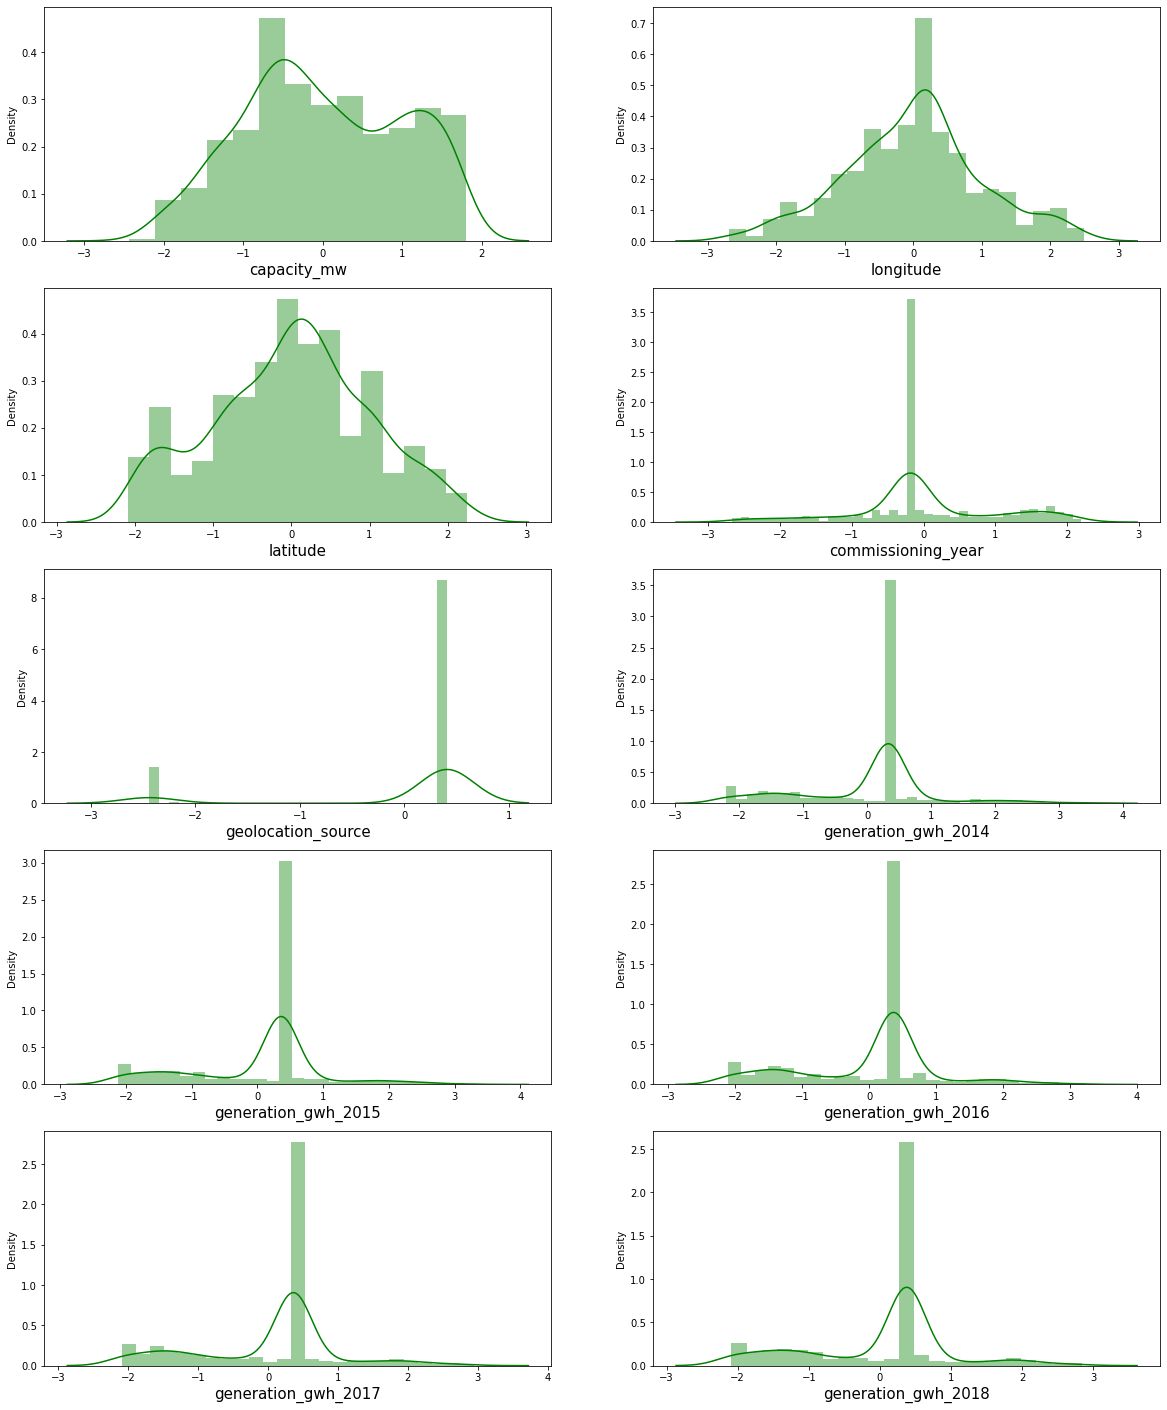

In [197]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in global_plant[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column],color='g')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

In [183]:
#Target Column "capacity_mw"
global_power.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
commissioning_year    -0.836962
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

#### Observation: 
- Skewness threshold taken is +/-0.5
- All the columns are not normallly distributed
- Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
- The 'capacity_mw' column data is highly skewed but we will not remove skewness from it as it is a Target column.
- Also we will not remove skewness from 'primary_fuel' and 'geolocation_source' as it contains categorical data.

#### Checking skewness through data visualization

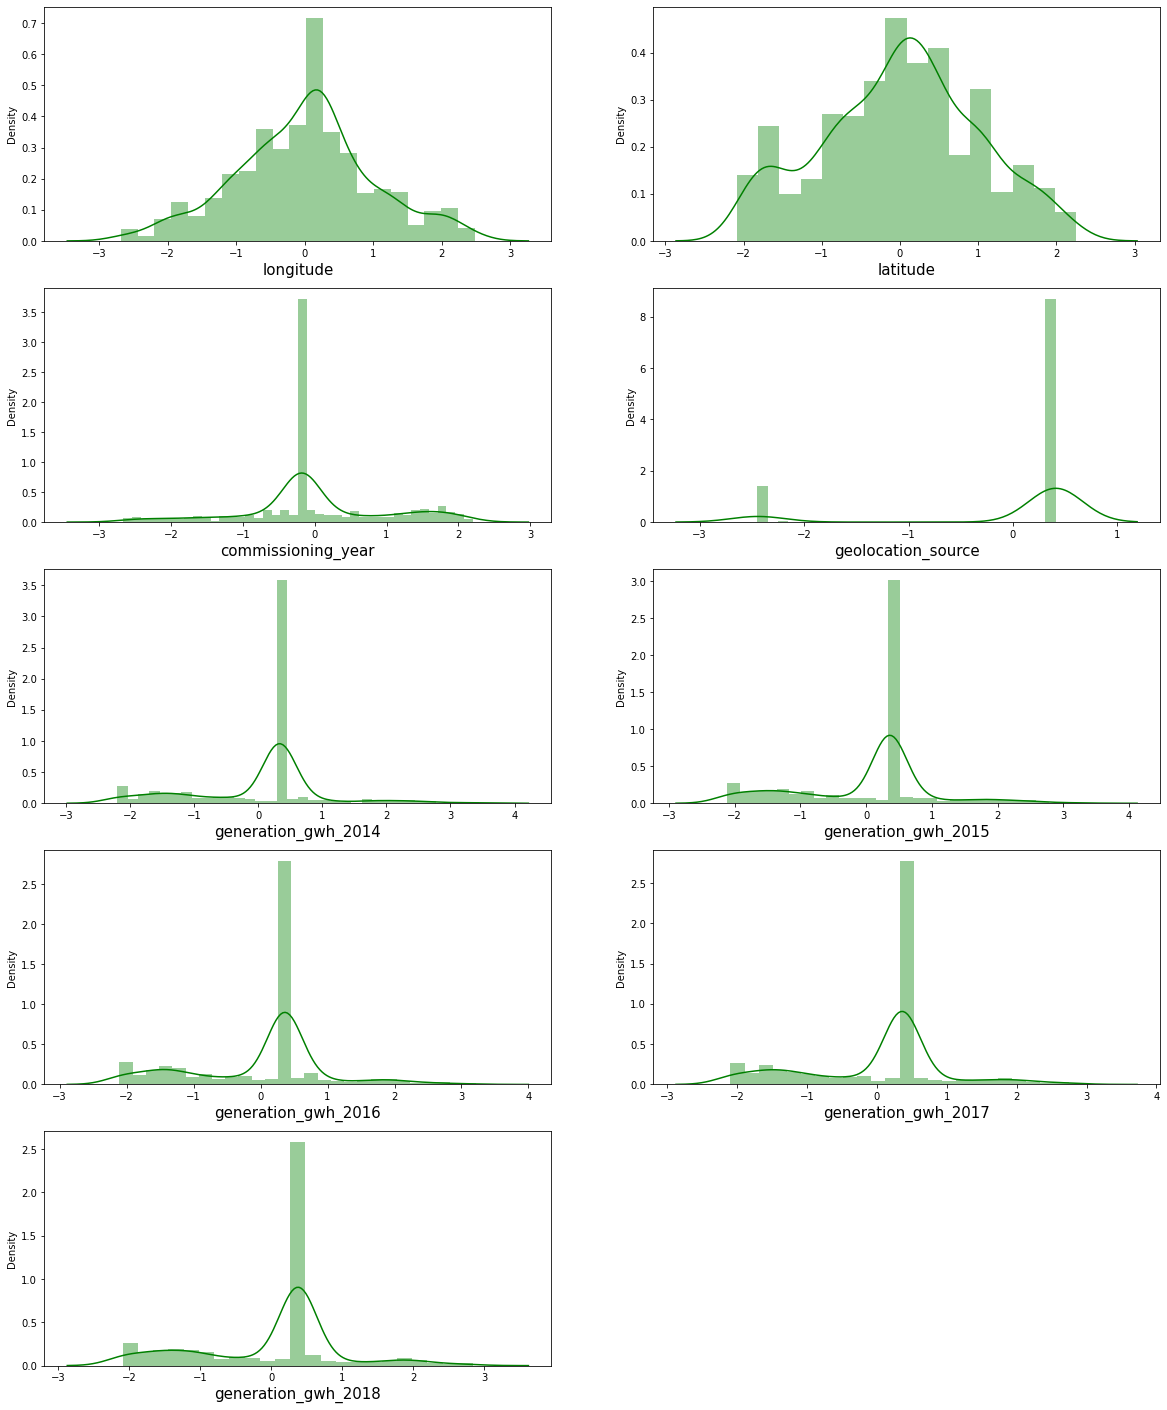

In [198]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in global_plant[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column],color='g')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

#### Removing skewness using yeo-johnson method

Target Column is "primary_fuel"

In [185]:
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

global_plant[collist]=power_transform(global_plant[collist],method='yeo-johnson')
global_plant[collist]

,capacity_mw,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,-0.928072,1.164277,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,-0.509209,0.595264,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,-2.363978,0.122311,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,2.442106,0.446997,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,1.253969,0.131611,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...
902,1.692530,0.219861,-0.793140,1.926982,0.409608,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
903,-1.597223,0.409525,-1.339555,-0.181973,-2.447802,0.327200,0.356092,0.359399,0.360086,0.375133
904,-0.502886,-0.235273,-0.957619,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
905,0.118754,-0.768095,0.526266,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133


#### Checking skewness again after removal

In [189]:
global_plant.skew()

capacity_mw            0.015527
latitude              -0.069694
longitude              0.000035
primary_fuel           0.408694
commissioning_year     0.031733
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

#### Checking skewness through data visualization again after removal

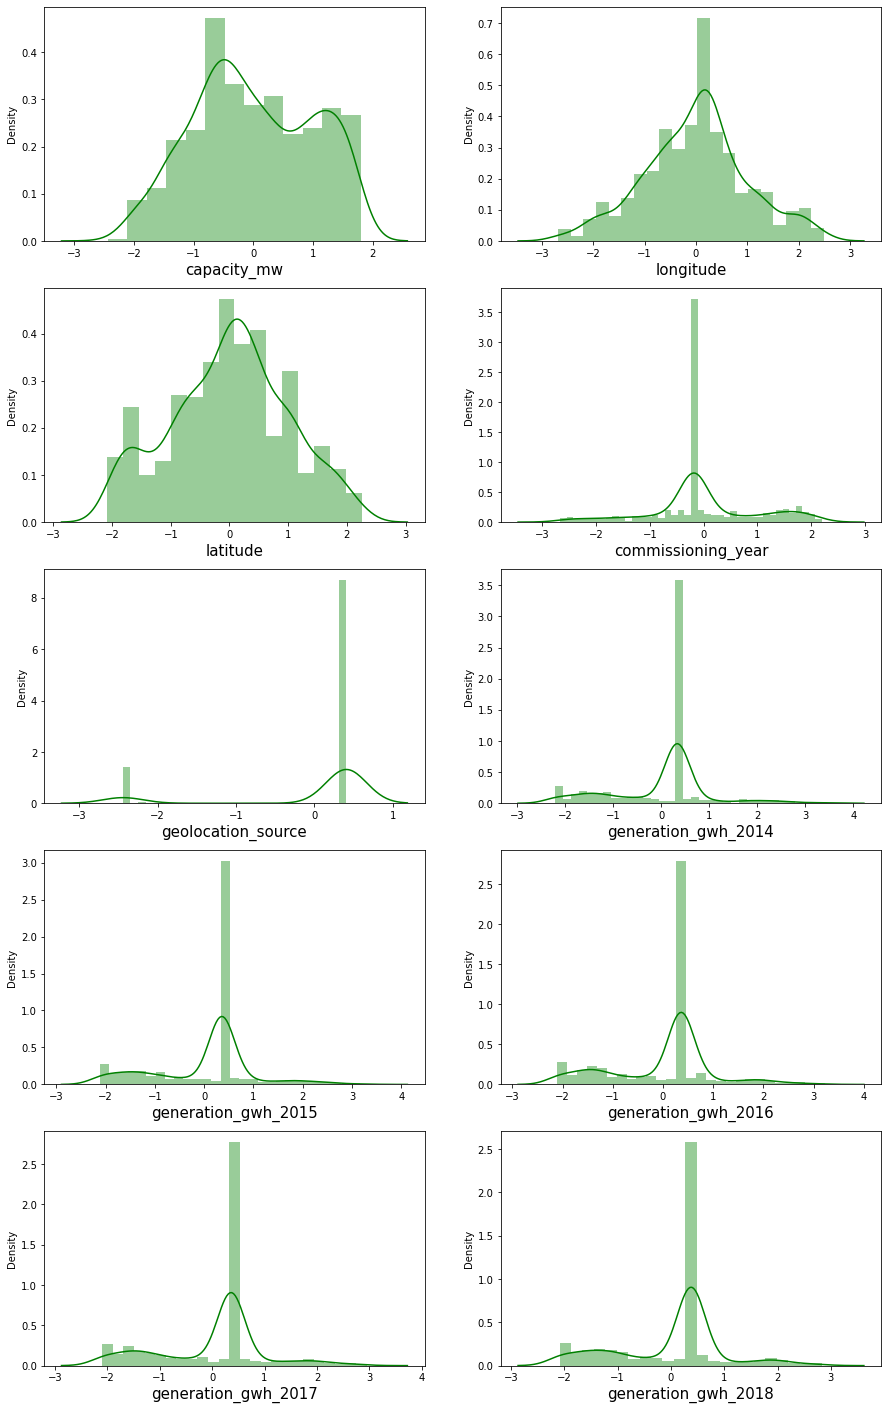

In [196]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,25))
plotnumber = 1

for column in global_plant[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column],color='g')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Target Column is "capacity_mw"

In [191]:
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
global_power[collist]=power_transform(global_power[collist],method='yeo-johnson')
global_power[collist]

,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.167827,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,0.596640,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368066,0.122069,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,0.447846,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,0.131399,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
902,0.216288,-0.795932,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,0.406355,-1.343416,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
904,-0.239580,-0.960773,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
905,-0.772877,0.527395,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


#### Checking skewness again after removal

In [192]:
global_power.skew()

capacity_mw            2.163488
latitude              -0.068504
longitude             -0.000494
primary_fuel           0.420074
commissioning_year     0.028796
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

#### Checking skewness through data visualization again after removal

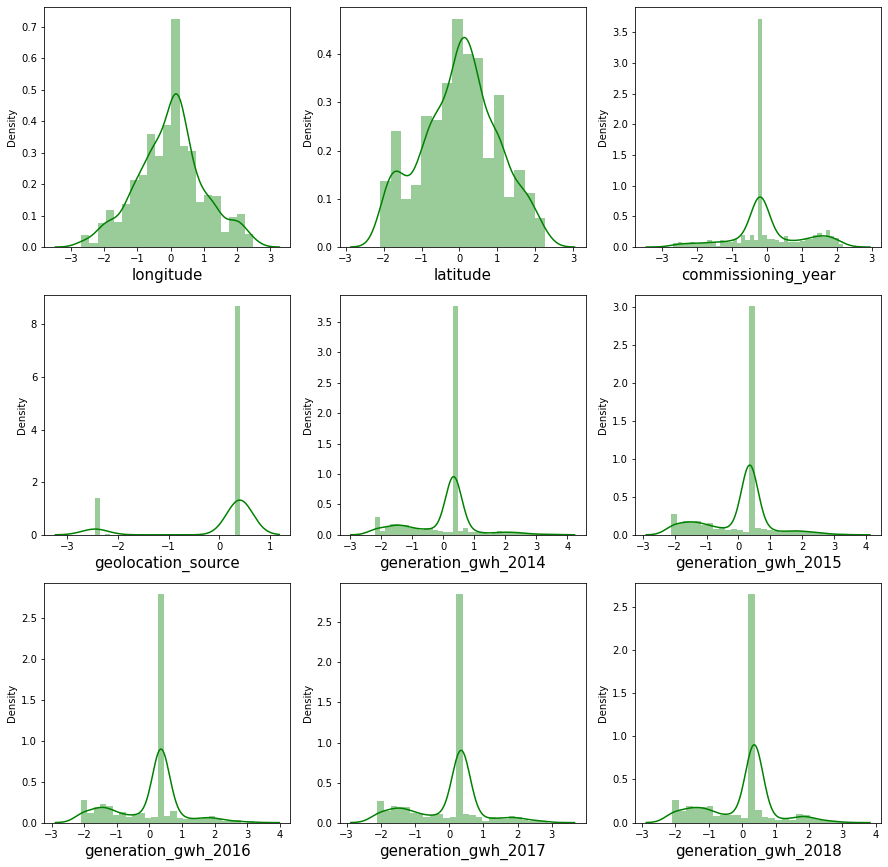

In [195]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in global_power[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(global_power[column],color='g')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

# Data preprocessing

### Spliting data into Target and Features:

#### Target Variable is primary_fuel

In [199]:
x=global_plant.drop("primary_fuel",axis=1)
y=global_plant["primary_fuel"]

In [200]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,1.164277,-0.928072,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,0.595264,-0.509209,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,0.122311,-2.363978,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,0.446997,2.442106,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,0.131611,1.253969,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435


In [201]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [202]:
x.shape, y.shape

((849, 10), (849,))

In [203]:
y.value_counts()

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [204]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [205]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [206]:
y.value_counts()

6    235
1    235
7    235
2    235
3    235
0    235
5    235
4    235
Name: primary_fuel, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

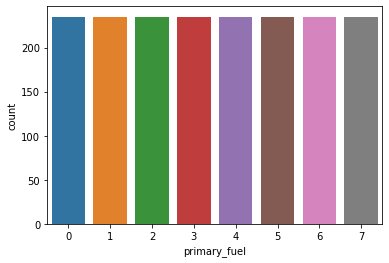

In [207]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Scaling data using Standard Scaler

In [208]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [209]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.731005,1.481487,-0.901091,1.679604,-2.475622,0.304853,0.349872,0.360428,0.325887,0.380169
1,0.217233,0.880820,-0.419751,-0.161236,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
2,-0.291434,0.381555,-2.551178,-0.161236,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
3,0.393610,0.724304,2.971786,0.691657,0.371509,-1.040362,-0.719731,-0.619578,-0.883477,-0.867849
4,1.775405,0.391373,1.606425,2.306685,0.371509,0.636666,1.866570,1.840862,1.477434,2.056676


#### Target Variable is capacity_mw

In [210]:
x1=global_power.drop("capacity_mw",axis=1)
y1=global_power["capacity_mw"]

In [431]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,6,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,1,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368066,7,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,2,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,1,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


In [211]:
y1.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [212]:
y1.value_counts()

5.00       37
10.00      21
15.00      20
600.00     20
1200.00    19
           ..
119.80      1
21.84       1
195.00      1
645.00      1
106.60      1
Name: capacity_mw, Length: 334, dtype: int64

## Scaling data using Standard Scaler

In [213]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [214]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

#### Target Variable is primary_fuel

In [215]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [216]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [217]:
x.columns[var_threshold.get_support()]

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [218]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

#### Target Variable is capacity_mw

In [219]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [220]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [221]:
x1.columns[var_threshold.get_support()]

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [222]:
# taking  out  all the  constant  columns 
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

## SelectKBest method

#### Target Variable is primary_fuel

In [224]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [225]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

               Feature        Score
4   geolocation_source  7628.653255
0          capacity_mw   495.820282
5  generation_gwh_2014   165.548615
9  generation_gwh_2018   134.108392
6  generation_gwh_2015   126.488099
7  generation_gwh_2016   122.700276
8  generation_gwh_2017   105.015808
2            longitude    62.759857
1             latitude    61.234001
3   commissioning_year    47.041876


Selecting the best features based on above scores, we can see that the column "commissioning_year" has most lowest features for the prediction, so we will drop this column.

In [226]:
x = x.drop([ "commissioning_year"],axis=1)

In [227]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.731005,1.481487,-0.901091,-2.475622,0.304853,0.349872,0.360428,0.325887,0.380169
1,0.217233,0.880820,-0.419751,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
2,-0.291434,0.381555,-2.551178,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
3,0.393610,0.724304,2.971786,0.371509,-1.040362,-0.719731,-0.619578,-0.883477,-0.867849
4,1.775405,0.391373,1.606425,0.371509,0.636666,1.866570,1.840862,1.477434,2.056676
...,...,...,...,...,...,...,...,...,...
1875,-1.021144,-1.836405,0.489305,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
1876,-0.963591,-1.511943,0.359187,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
1877,-0.573923,0.259025,0.447905,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169
1878,-0.453700,-1.781967,0.460364,0.371509,0.304853,0.349872,0.360428,0.325887,0.380169


#### Target Variable is capacity_mw

In [228]:
best_fit1 = SelectKBest(score_func = f_classif, k ='all')
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)

In [229]:
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

               Feature     Score
9  generation_gwh_2018  4.769757
8  generation_gwh_2017  4.381400
7  generation_gwh_2016  3.957211
5  generation_gwh_2014  3.396666
6  generation_gwh_2015  3.378346
4   geolocation_source  3.275491
2         primary_fuel  3.196157
3   commissioning_year  2.276087
1            longitude  1.710206
0             latitude  1.404031


Selecting the best features based on above scores, we can see that the column "latitude" has most lowest features for the prediction, so we will drop this column.

In [230]:
x1 = x1.drop([ "latitude"],axis=1)

In [231]:
x1

,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
850,0.216288,-0.972887,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
851,0.406355,1.179853,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
852,-0.239580,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
853,-0.772877,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


Now, we have completed features selection process through using 2 techniques.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

##### Target Variable is primary_fuel

In [232]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.358550,capacity_mw
1,1.149405,latitude
2,1.151063,longitude
3,1.438004,geolocation_source
4,5.804697,generation_gwh_2014
5,9.623749,generation_gwh_2015
6,15.988986,generation_gwh_2016
7,8.309260,generation_gwh_2017
8,13.825166,generation_gwh_2018


The VIF value is more than 10 in the columns generation_gwh_2015, 'generation_gwh_2016' and 'generation_gwh_2018'. But column 'generation_gwh_2016' is having highest VIF value. So, we will drop column 'generation_gwh_2016'.

In [233]:
x.drop('generation_gwh_2016', axis =1, inplace=True)

In [234]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.731005,1.481487,-0.901091,-2.475622,0.304853,0.349872,0.325887,0.380169
1,0.217233,0.880820,-0.419751,0.371509,0.304853,0.349872,0.325887,0.380169
2,-0.291434,0.381555,-2.551178,0.371509,0.304853,0.349872,0.325887,0.380169
3,0.393610,0.724304,2.971786,0.371509,-1.040362,-0.719731,-0.883477,-0.867849
4,1.775405,0.391373,1.606425,0.371509,0.636666,1.866570,1.477434,2.056676
...,...,...,...,...,...,...,...,...
1875,-1.021144,-1.836405,0.489305,0.371509,0.304853,0.349872,0.325887,0.380169
1876,-0.963591,-1.511943,0.359187,0.371509,0.304853,0.349872,0.325887,0.380169
1877,-0.573923,0.259025,0.447905,0.371509,0.304853,0.349872,0.325887,0.380169
1878,-0.453700,-1.781967,0.460364,0.371509,0.304853,0.349872,0.325887,0.380169


### Checking again Multicolinearity using VIF

In [235]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.357727,capacity_mw
1,1.149232,latitude
2,1.130618,longitude
3,1.437427,geolocation_source
4,5.799027,generation_gwh_2014
5,7.499071,generation_gwh_2015
6,7.052174,generation_gwh_2017
7,11.418397,generation_gwh_2018


Here we can see that Multicolinearity is still present in the column "generation_gwh_2018". So, we will again drop highest VIF value column which is 'generation_gwh_2018' for removing Multicolinearity.

In [236]:
x.drop('generation_gwh_2018', axis =1, inplace=True)

### Checking again Multicolinearity using VIF

In [237]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.346950,capacity_mw
1,1.141633,latitude
2,1.130606,longitude
3,1.437177,geolocation_source
4,5.578153,generation_gwh_2014
5,6.602326,generation_gwh_2015
6,3.044924,generation_gwh_2017


__Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.__

### VIF for Target Variable is capacity_mw 

In [238]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.267875,longitude
1,1.480675,primary_fuel
2,1.092229,commissioning_year
3,1.355969,geolocation_source
4,4.126983,generation_gwh_2014
5,7.728307,generation_gwh_2015
6,10.642643,generation_gwh_2016
7,11.549391,generation_gwh_2017
8,11.332709,generation_gwh_2018


The VIF value is more than 10 in the columns 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'. But column 'generation_gwh_2017' is having highest VIF value. So, we will drop column 'generation_gwh_2017'.

In [459]:
x1.drop('generation_gwh_2017', axis =1, inplace=True)

### Checking again Multicolinearity using VIF

In [239]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.267875,longitude
1,1.480675,primary_fuel
2,1.092229,commissioning_year
3,1.355969,geolocation_source
4,4.126983,generation_gwh_2014
5,7.728307,generation_gwh_2015
6,10.642643,generation_gwh_2016
7,11.549391,generation_gwh_2017
8,11.332709,generation_gwh_2018


__Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.__

# Creating Model

We are using Classification Model for Target Variable, primary_fuel and Regression Model for Target Variable, capacity_mw 

## Classification Model

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

### Finding the best random state among all the models

In [241]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8421985815602837  on Random_state  23


__At random state 45, we are getting best accuracy score i.e., 85%__

### Creating train-test-split

In [242]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [243]:
x.shape, y.shape

((1880, 7), (1880,))

In [244]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1316, 7), (1316,), (564, 7), (564,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. 

## Logistic Regression

In [245]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.5868794326241135
confusion_matrix: 
 [[49  0  0  1  0  0  0 18]
 [ 6 33  5  4 10  2  0  1]
 [ 0 10 42  6  4 11  0  7]
 [ 7 11  6 16  5 10  0  5]
 [ 0 14  0  0 65  0  0  0]
 [ 0  2  2  6  0 39  0 22]
 [ 0  1  0  0  0  0 68  0]
 [39  2  2  1  0 13  0 19]]
classification_report: 
               precision    recall  f1-score   support

           0       0.49      0.72      0.58        68
           1       0.45      0.54      0.49        61
           2       0.74      0.53      0.61        80
           3       0.47      0.27      0.34        60
           4       0.77      0.82      0.80        79
           5       0.52      0.55      0.53        71
           6       1.00      0.99      0.99        69
           7       0.26      0.25      0.26        76

    accuracy                           0.59       564
   macro avg       0.59      0.58      0.58       564
weighted avg       0.59      0.59      0.58       564



Here we are getting 61% accuracy using Logistic Regression.

### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

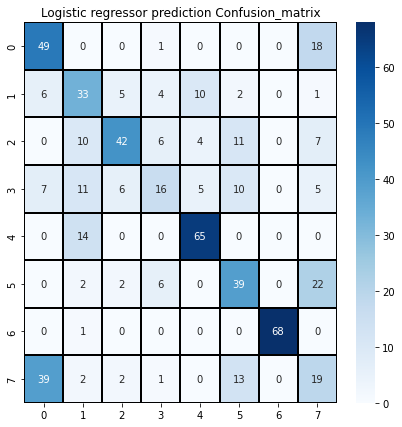

In [246]:
cm = confusion_matrix(y_test,pred_lr)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Logistic regressor prediction Confusion_matrix")

## Random Forest Classifier

In [247]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8953900709219859
confusion_matrix: 
 [[67  0  0  1  0  0  0  0]
 [ 2 46  7  2  1  2  0  1]
 [ 0  5 71  1  0  3  0  0]
 [ 1  3  6 41  2  1  0  6]
 [ 0  3  0  0 76  0  0  0]
 [ 1  1  2  0  0 67  0  0]
 [ 0  0  0  0  0  0 69  0]
 [ 2  1  1  3  0  0  1 68]]
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.78      0.75      0.77        61
           2       0.82      0.89      0.85        80
           3       0.85      0.68      0.76        60
           4       0.96      0.96      0.96        79
           5       0.92      0.94      0.93        71
           6       0.99      1.00      0.99        69
           7       0.91      0.89      0.90        76

    accuracy                           0.90       564
   macro avg       0.89      0.89      0.89       564
weighted avg       0.89      0.90      0.89       564



Here we are getting 89% accuracy using RFC.

### Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

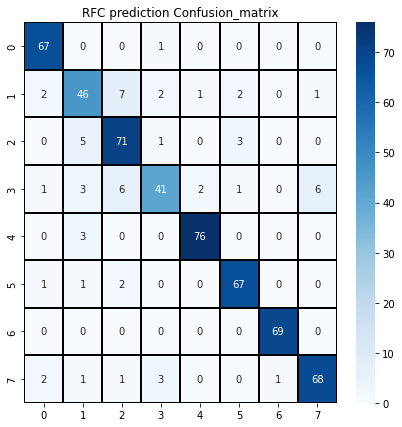

In [248]:
cm = confusion_matrix(y_test,pred_rfc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("RFC prediction Confusion_matrix")

## Decision Tree Classifier

In [249]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8333333333333334
confusion_matrix: 
 [[64  2  0  2  0  0  0  0]
 [ 1 42  7  5  1  2  0  3]
 [ 0  9 59  7  1  4  0  0]
 [ 1  3  9 38  2  3  0  4]
 [ 0  3  1  3 72  0  0  0]
 [ 1  1  0  0  0 68  0  1]
 [ 0  0  0  0  0  0 69  0]
 [ 7  3  1  6  0  1  0 58]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        68
           1       0.67      0.69      0.68        61
           2       0.77      0.74      0.75        80
           3       0.62      0.63      0.63        60
           4       0.95      0.91      0.93        79
           5       0.87      0.96      0.91        71
           6       1.00      1.00      1.00        69
           7       0.88      0.76      0.82        76

    accuracy                           0.83       564
   macro avg       0.83      0.83      0.83       564
weighted avg       0.83      0.83      0.83       564



Here we are getting 84% accuracy using DTC.

## Confusion Matrix for DTC

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

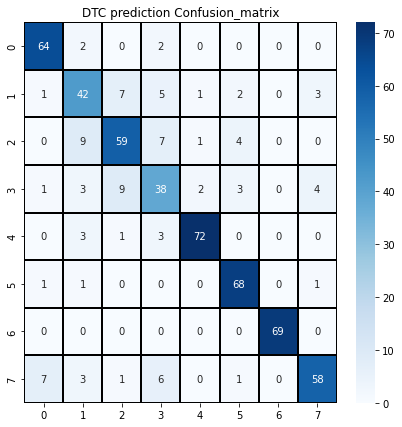

In [250]:
cm = confusion_matrix(y_test,pred_dtc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("DTC prediction Confusion_matrix")

## Support Vector Machine Classifier

In [251]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.648936170212766
confusion_matrix: 
 [[62  1  0  0  0  0  0  5]
 [ 7 31  8  7  6  2  0  0]
 [ 0 11 47  8  1  8  0  5]
 [ 8 10  9 16  3  9  0  5]
 [ 0 19  0  0 60  0  0  0]
 [ 0  2  1  3  0 48  0 17]
 [ 1  1  0  0  0  0 67  0]
 [33  2  3  0  0  3  0 35]]
classification_report: 
               precision    recall  f1-score   support

           0       0.56      0.91      0.69        68
           1       0.40      0.51      0.45        61
           2       0.69      0.59      0.64        80
           3       0.47      0.27      0.34        60
           4       0.86      0.76      0.81        79
           5       0.69      0.68      0.68        71
           6       1.00      0.97      0.99        69
           7       0.52      0.46      0.49        76

    accuracy                           0.65       564
   macro avg       0.65      0.64      0.63       564
weighted avg       0.66      0.65      0.64       564



Here we are getting 66% accuracy using SVC.

### Confusion Matrix for SVC

Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

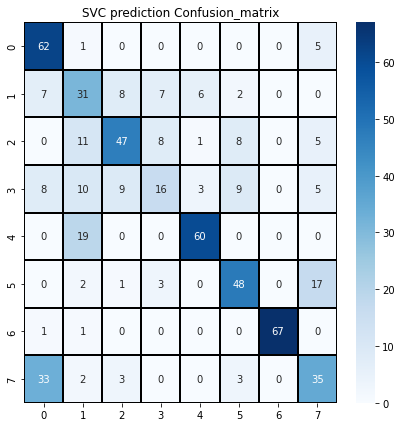

In [252]:
cm = confusion_matrix(y_test,pred_svc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("SVC prediction Confusion_matrix")

## KNN Classifier

In [253]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8404255319148937
confusion_matrix: 
 [[66  0  0  1  0  0  0  1]
 [ 4 40  4  2  8  2  0  1]
 [ 0  2 64  2  5  7  0  0]
 [ 2  6  5 37  2  1  0  7]
 [ 0  0  0  0 79  0  0  0]
 [ 0  1  5  3  0 62  0  0]
 [ 0  1  0  0  0  0 68  0]
 [ 9  1  2  2  0  3  1 58]]
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.97      0.89        68
           1       0.78      0.66      0.71        61
           2       0.80      0.80      0.80        80
           3       0.79      0.62      0.69        60
           4       0.84      1.00      0.91        79
           5       0.83      0.87      0.85        71
           6       0.99      0.99      0.99        69
           7       0.87      0.76      0.81        76

    accuracy                           0.84       564
   macro avg       0.84      0.83      0.83       564
weighted avg       0.84      0.84      0.84       564



Here we are getting 83% accuracy using KNN.

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

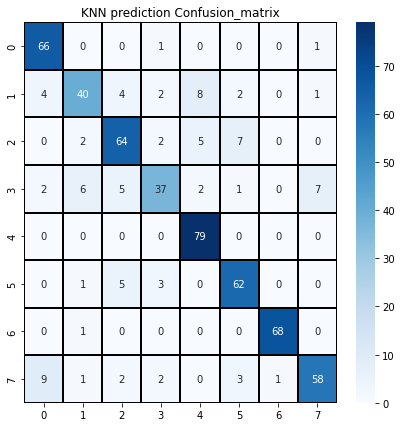

In [254]:
cm = confusion_matrix(y_test,pred_knn)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("KNN prediction Confusion_matrix")

## Gradient Boosting Classifier

In [255]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.8687943262411347
confusion_matrix: 
 [[65  2  0  1  0  0  0  0]
 [ 3 46  6  3  1  1  0  1]
 [ 0  9 63  4  2  2  0  0]
 [ 1  5  4 42  2  1  0  5]
 [ 0  4  0  0 75  0  0  0]
 [ 2  1  1  0  0 67  0  0]
 [ 0  0  0  0  0  0 69  0]
 [ 7  2  1  3  0  0  0 63]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        68
           1       0.67      0.75      0.71        61
           2       0.84      0.79      0.81        80
           3       0.79      0.70      0.74        60
           4       0.94      0.95      0.94        79
           5       0.94      0.94      0.94        71
           6       1.00      1.00      1.00        69
           7       0.91      0.83      0.87        76

    accuracy                           0.87       564
   macro avg       0.87      0.86      0.86       564
weighted avg       0.87      0.87      0.87       564



Here we are getting 87% accuracy using RFC.

## Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

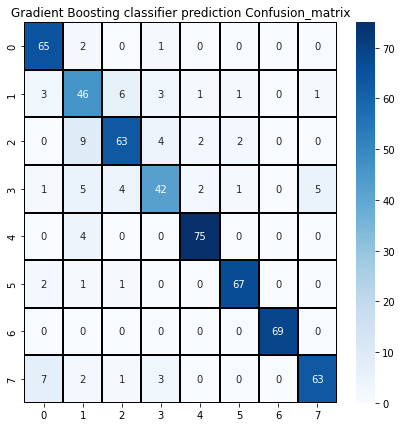

In [256]:
cm = confusion_matrix(y_test,pred_gb)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

# Cross Validation Score for all the Regression model

### CV Score for Logistic Regression

In [257]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.5244680851063829


### CV Score for Random Forest Classifier

In [258]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.8648936170212765


### CV Score for Decision Tree Classifier

In [259]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8138297872340428


### CV Score for Support Vector Classifier

In [260]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.6117021276595744


### CV Score for KNN Classifier

In [261]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8335106382978724


### CV Score for Gradient Boosting Classifier

In [262]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.8404255319148936


#### From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

# Hyper parameter tuning for best model using GridsearchCV

In [263]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [264]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [265]:
rfc=RandomForestClassifier(random_state=30)

In [266]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [267]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [268]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [269]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'n_estimators': 900}

In [270]:
Power_Plant = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
Power_Plant.fit(x_train, y_train)
pred = Power_Plant.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy score: ",acc*100)

accuracy score:  78.36879432624113


In [271]:
# calculating the scores 
score = cross_val_score(rfc,x,y,cv=10,scoring="accuracy").mean()
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

confusion_matrix: 
 [[58  0  0  0  0  0  0  2]
 [ 8 35 11  3 17  1  0  6]
 [ 1  4 42  1  0  7  0  2]
 [ 9  4 13 34  3  1  0  6]
 [ 0  0  0  0 83  0  0  0]
 [ 5  0  3  0  0 69  0  2]
 [ 0  0  0  0  0  0 67  2]
 [11  0  0  0  0  0  0 54]]
classification_report: 
               precision    recall  f1-score   support

           0       0.63      0.97      0.76        60
           1       0.81      0.43      0.56        81
           2       0.61      0.74      0.67        57
           3       0.89      0.49      0.63        70
           4       0.81      1.00      0.89        83
           5       0.88      0.87      0.88        79
           6       1.00      0.97      0.99        69
           7       0.73      0.83      0.78        65

    accuracy                           0.78       564
   macro avg       0.80      0.79      0.77       564
weighted avg       0.81      0.78      0.77       564



### Confusion Matrix

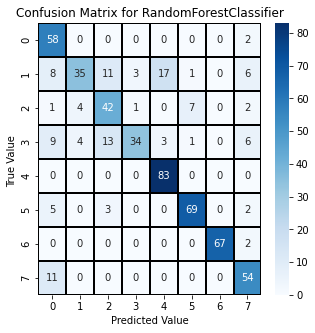

In [272]:
cm = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## ROC-AUC Curve

In [273]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

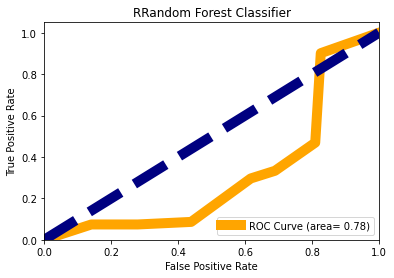

In [274]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RRandom Forest Classifier")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.79.

## Saving the Classification Model

In [275]:
filename='Global_Power_Plant.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([2, 6, 5, 3, 4, 4, 0, 4, 7, 4, 3, 3, 4, 6, 0, 0, 2, 1, 5, 0, 0, 5,
       0, 5, 4, 6, 6, 1, 3, 4, 1, 6, 7, 7, 0, 3, 4, 2, 4, 2, 0, 0, 5, 1,
       0, 2, 5, 1, 5, 4, 5, 6, 2, 4, 5, 7, 4, 5, 4, 2, 5, 2, 7, 1, 4, 3,
       1, 4, 1, 7, 6, 2, 5, 6, 6, 4, 4, 2, 4, 6, 7, 6, 2, 1, 7, 3, 1, 4,
       2, 0, 6, 4, 5, 5, 3, 1, 4, 0, 2, 0, 7, 4, 6, 5, 4, 6, 5, 1, 7, 5,
       5, 5, 2, 2, 7, 7, 1, 2, 0, 5, 4, 2, 5, 3, 4, 2, 7, 5, 4, 3, 5, 1,
       3, 6, 7, 2, 3, 4, 1, 3, 7, 6, 1, 6, 2, 6, 7, 1, 7, 4, 0, 2, 6, 1,
       2, 7, 5, 0, 5, 6, 0, 2, 0, 4, 6, 5, 5, 2, 5, 3, 0, 5, 6, 6, 4, 3,
       7, 4, 3, 7, 4, 6, 4, 6, 0, 6, 7, 7, 0, 1, 4, 4, 2, 7, 1, 3, 7, 1,
       0, 1, 5, 4, 7, 2, 6, 3, 7, 2, 2, 7, 2, 0, 1, 1, 5, 0, 2, 5, 2, 0,
       3, 3, 4, 0, 5, 1, 1, 6, 5, 5, 2, 1, 0, 1, 5, 0, 7, 3, 7, 7, 5, 1,
       6, 7, 4, 7, 4, 3, 4, 6, 3, 4, 7, 5, 7, 4, 6, 2, 4, 3, 6, 5, 5, 3,
       5, 4, 1, 5, 4, 7, 1, 3, 4, 0, 7, 0, 4, 4, 0, 7, 2, 4, 7, 6, 7, 0,
       4, 0, 4, 6, 5, 7, 3, 2, 2, 0, 0, 7, 7, 6, 1,

### Checking predicted and original values

In [276]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Global_Power_Plant=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Global_Power_Plant

,Orginal,Predicted
0,2,2
1,6,6
2,5,5
3,3,3
4,3,4
...,...,...
559,6,6
560,3,3
561,4,4
562,6,6


## Regression Model

#### Target column is "capacity_mw"

### Finding the best random state among all the models

In [277]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7723174922864109 on random_state: 37


__At random state 37, we are getting best accuracy score i.e., 79%__

## Creating train-test-split

In [278]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [279]:
x1.shape, y1.shape

((855, 9), (855,))

In [280]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((598, 9), (598,), (257, 9), (257,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

## Linear Regression

In [281]:
from sklearn.linear_model import LinearRegression

In [282]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.4564968043561265
Mean abs error:  255.91071910986616
Mean squared error:  125678.9645958405
Root Mean Squared Error:  354.5122911773871


__R2 score for Linear Regression is 46%__

### Checking the performance of the model by graph

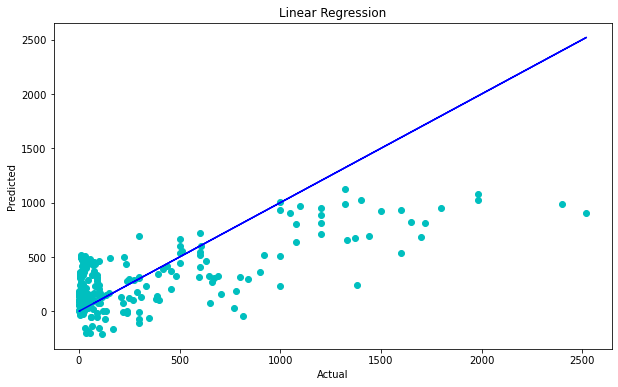

In [283]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

## Random forest Regression Model

In [284]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8143301413623065
Mean abs error:  104.56469048265349
Mean squared error:  42934.054072299026
Root Mean Squared Error:  207.20534276967626


__R2 score for Random forest Regression is 81%__

### Checking the performance of the model by graph

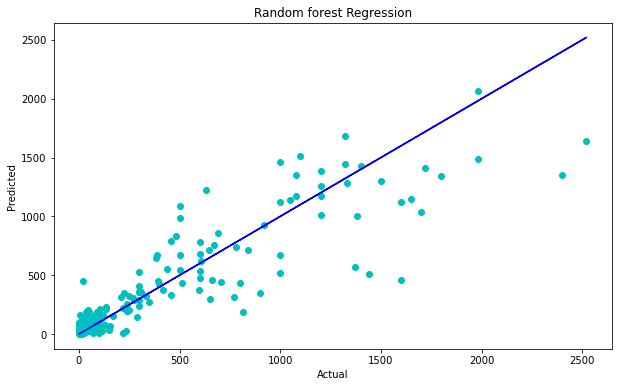

In [285]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest Regression")
plt.show()

## KNN regressor

In [286]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7123270416791432
Mean abs error:  128.09383916990922
Mean squared error:  66521.11677311572
Root Mean Squared Error:  257.91687958161197


__R2 score for KNN regressor is 73%__

### Checking the performance of the model by graph

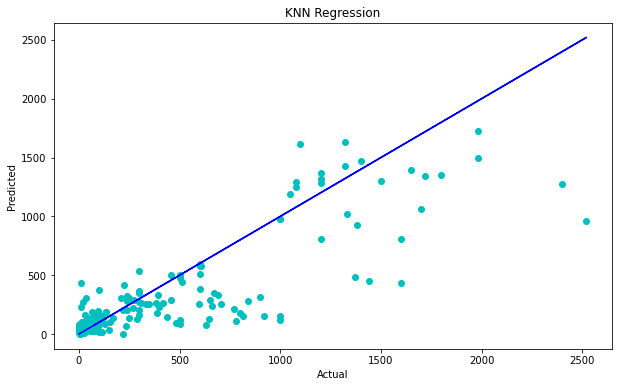

In [287]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression")
plt.show()

## Decision Tree Regressor

In [288]:
# Checking R2 score for Decision Tree Regressor 
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
# prediction
pred_DTR=DTR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_DTR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.7829588440290017
Mean abs error:  107.56462645914395
Mean squared error:  50188.311634128404
Root Mean Squared Error:  224.02747964062


__R2 score for Decision Tree Regressor is 78%__

### Checking the performance of the model by graph

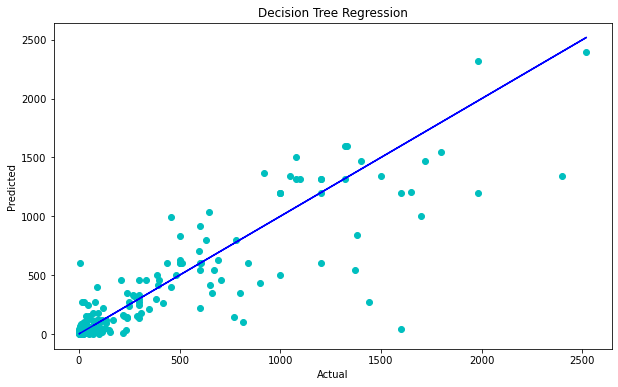

In [289]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_DTR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regression")
plt.show()

## Gradient Boosting Regressor

In [290]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7996008366879704
Mean abs error:  108.30134714821017
Mean squared error:  46340.03912542132
Root Mean Squared Error:  215.26736660585905


__R2 score for Gradient Boosting Regressor is 79%__

### Checking the performance of the model by graph

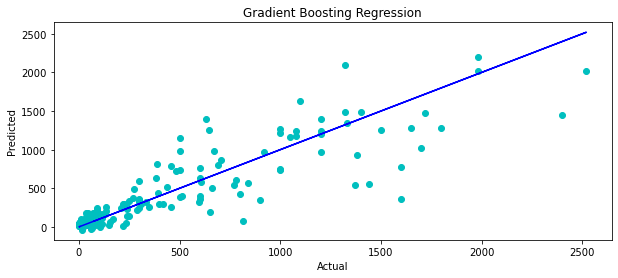

In [291]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting Regression")
plt.show()

## Ridge Regressor

In [292]:
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'lsqr'}


In [293]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.45518237341418355
Mean abs error:  256.15341597145465
Mean squared error:  125982.91187920545
Root Mean Squared Error:  354.94071600649795


__R2 score for Ridge regressor is 45%__

### Checking the performance of the model by graph

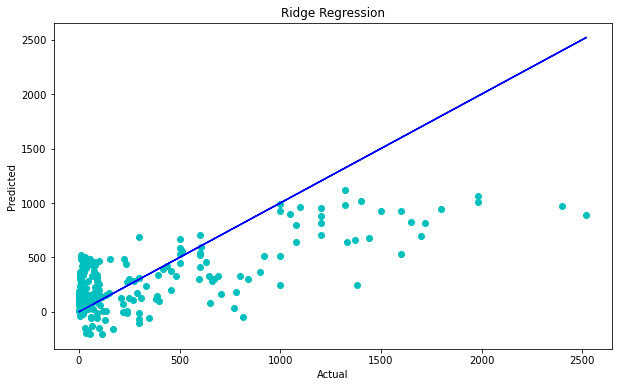

In [294]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")
plt.show()

## Checking Cross Validation Score of Models

### Checking CV score for Linear Regression

In [295]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.36739548723591703


### Checking CV score for Random Forest Regression

In [296]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7831637044037326


### Checking CV score for KNN Regression

In [297]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.7053984621405803


### Checking CV score for DTR 

In [298]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.6322546112617654


### Checking CV score for GBR Regression

In [299]:
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x1,y1,cv=7).mean())

The CV score  for  the GBR regressor is : 0.7193852531836242


### Checking CV score for Ridge Regression

In [300]:
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x1,y1,cv=7).mean())

The CV score  for  the Ridge regressor is : 0.37027717344821237


From the observation of R2 Score and cross validation score and their difference we can predict that Random Forest Regressor is the best model.

# Hyper Parameter Tuning

### The Random Forest Regressor with GridsearchCV

In [301]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [302]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

#### Creating Final Regressor Model

In [303]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [304]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

81.43301413623065


__So, after the Hypertuning now we got a accuracy score of 81% on Random Forest Regression__

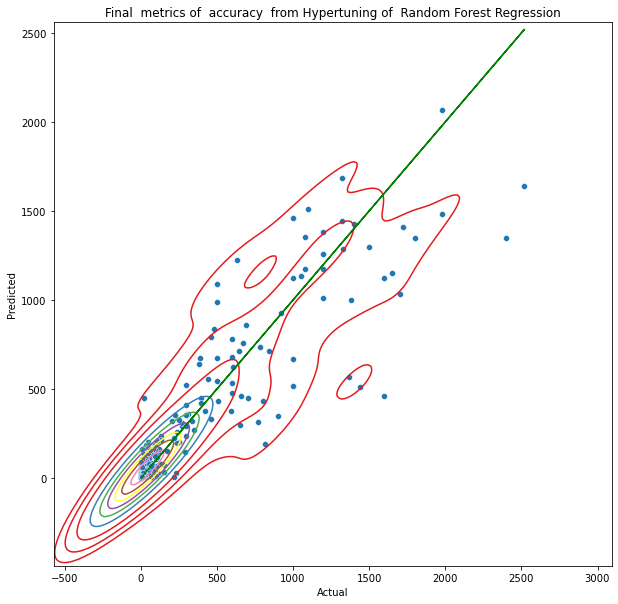

In [305]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

### Saving The Predictive Regressor Model

In [306]:
#saving the model at local file system
filename='Global_Power_Plant_Database_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([  27.92720013,  313.12979576,   51.94569287,   34.2525808 ,
         19.65566659,   60.13692198,   33.0723176 ,  403.39584733,
         57.21440244,  689.90878552,  119.02516095,  405.90849709,
         15.64570302,  163.95094209,   57.21440244,   25.44277741,
        469.69953641,  359.74947309,   45.84325664,   57.84225958,
       1172.53445878,  351.52028753,   13.60931004,  146.07658544,
         35.92090985,   54.48169058,   57.84225958,   16.8205346 ,
        113.51808713,  154.64798672,  120.22206412,  416.2088473 ,
         68.29842411,  166.03176465,   74.1621024 ,   37.45419501,
         21.02166423,  199.25441061,  264.98543634,   24.37625552,
         31.15043593, 1054.89366237,   57.84225958,  736.73487741,
       1214.61251308,   43.67059237,  668.91814522,   57.84225958,
       1165.2341226 ,  191.28507594,   78.11553766,  502.4472499 ,
       1581.76677444,   26.83022958,  751.72555345,   44.42281168,
        349.10629171,  288.41679894,    5.28832732,   34.25258

### Prediction of Regressor Model

In [307]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Global_Power_Plant_Database_Project = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Global_Power_Plant_Database_Project

,Original,Predicted
0,75.00,27.927200
1,272.30,313.129796
2,50.40,51.945693
3,34.65,34.252581
4,9.90,19.655667
...,...,...
252,1320.00,1431.222008
253,105.70,209.711969
254,5.00,17.223143
255,221.00,6.849033


### Let's plot and visualize

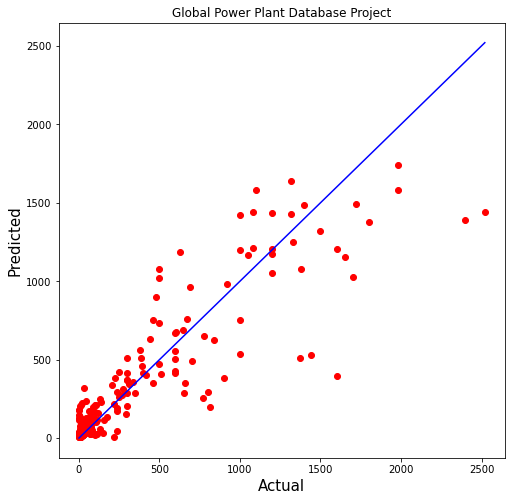

In [308]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Global Power Plant Database Project")
plt.show()